<a href="https://colab.research.google.com/github/Gennifer2001/tesis/blob/main/T%C3%A9sisjeje2_2xd(d1compilado).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***Importar librerías necesarias***

In [18]:
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw
from statistics import mean

In [19]:
!pip install ete3
import ete3
from ete3 import Tree
import scipy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
from scipy.cluster import hierarchy
import networkx,pylab
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
from scipy.spatial.distance import pdist,squareform
import random
from IPython.display import display, Latex

### ***Cargar y limpiar base de datos***

In [20]:
 url = 'https://raw.githubusercontent.com/Gennifer2001/tesis/main/psyco.csv'
df = pd.read_csv(url)
df['age'] = df['age'].replace("Dec-18", "12-18", regex=True)
df

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,...,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw,Unnamed: 19,time_bp.1,travel+work
0,19-25,Male,Student in College,NaN,7,5,0.5,3,3,0.0,...,1.0,-0.5,-0.5,100,1,Complete Physical Attendance,Yes,NaN,7,NaN
1,12-18,Male,Student in School,NaN,7,11,0.5,4,2,-0.5,...,1.0,1.0,1.0,1111,1110,Complete Physical Attendance,No,NaN,7,NaN
2,19-25,Male,Student in College,NaN,7,7,1.5,2,2,1.0,...,0.5,0.5,0.5,1100,111,Complete Physical Attendance,Yes,NaN,7,NaN
3,19-25,Male,Student in College,NaN,7,7,1.5,3,1,0.0,...,0.0,-1.0,-0.5,100,1111,Complete Physical Attendance,Yes,NaN,7,NaN
4,19-25,Female,Student in College,NaN,7,7,1.5,2,2,0.0,...,0.0,0.5,0.0,1010,1000,Complete Physical Attendance,Yes,NaN,7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170,40-50,Female,Entrepreneur,NaN,9,9,0.5,2,1,0.5,...,0.5,0.0,0.0,10,1,Complete Physical Attendance,Yes,NaN,9,NaN
1171,26-32,Female,Homemaker,NaN,5,12,0.5,3,5,-0.5,...,0.0,-0.5,-0.5,100,111,Complete Physical Attendance,Maybe,NaN,5,NaN
1172,26-32,Male,Working Professional,Engineering,9,11,0.5,3,2,0.5,...,0.5,0.0,0.0,1111,110,Complete Physical Attendance,Maybe,NaN,9,NaN
1173,26-32,Male,Working Professional,Engineering,11,12,1.5,2,2,0.0,...,-1.0,0.0,-0.5,1111,1100,Complete Physical Attendance,Yes,NaN,11,NaN


In [21]:
df1 = df.drop(['age','gender', 'occupation','line_of_work','prefer','certaindays_hw','Unnamed: 19','travel+work','like_hw','dislike_hw','time_bp.1','Unnamed: 19'], axis=1)
nombres =['time_bp','time_dp','travel_time','easeof_online','home_env','prod_inc','sleep_bal','new_skill','fam_connect','relaxed','self_time']
df1

,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
0,7,5,0.5,3,3,0.0,0.0,0.5,1.0,-0.5,-0.5
1,7,11,0.5,4,2,-0.5,0.5,-1.0,1.0,1.0,1.0
2,7,7,1.5,2,2,1.0,0.0,0.5,0.5,0.5,0.5
3,7,7,1.5,3,1,0.0,1.0,0.5,0.0,-1.0,-0.5
4,7,7,1.5,2,2,0.0,0.0,0.0,0.0,0.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1170,9,9,0.5,2,1,0.5,-0.5,-0.5,0.5,0.0,0.0
1171,5,12,0.5,3,5,-0.5,-1.0,-0.5,0.0,-0.5,-0.5
1172,9,11,0.5,3,2,0.5,0.5,0.5,0.5,0.0,0.0
1173,11,12,1.5,2,2,0.0,0.0,0.0,-1.0,0.0,-0.5


Eliminaremos todos las variables no numericas y las que no nos aportan información

In [22]:
# @title
df2 = df.drop(['gender', 'occupation','line_of_work','prefer','certaindays_hw','Unnamed: 19','travel+work','like_hw','dislike_hw','time_bp.1','Unnamed: 19'], axis=1)
imge = df2.head(10)
imge

,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
0,19-25,7,5,0.5,3,3,0.0,0.0,0.5,1.0,-0.5,-0.5
1,12-18,7,11,0.5,4,2,-0.5,0.5,-1.0,1.0,1.0,1.0
2,19-25,7,7,1.5,2,2,1.0,0.0,0.5,0.5,0.5,0.5
3,19-25,7,7,1.5,3,1,0.0,1.0,0.5,0.0,-1.0,-0.5
4,19-25,7,7,1.5,2,2,0.0,0.0,0.0,0.0,0.5,0.0
5,19-25,5,7,0.5,4,4,-1.0,-1.0,0.0,-0.5,0.0,0.0
6,19-25,5,4,0.5,1,3,0.5,0.5,1.0,0.5,1.0,1.0
7,19-25,7,9,0.5,3,2,0.0,-0.5,-0.5,-1.0,-0.5,0.0
8,19-25,5,9,0.5,1,2,1.0,1.0,1.0,1.0,1.0,1.0
9,19-25,7,7,1.5,2,2,0.0,0.0,0.0,-1.0,0.0,0.0


### ***Clusterización***

In [23]:
seed = 42
np.random.seed(seed)
dfprueba = df2.sample(n=1175)

Escalar los datos

In [24]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(dfprueba.drop(["age"],axis=1))

In [25]:
dfprueba.reset_index(drop=True,inplace=True)
ndf = pd.DataFrame(df_scaled, columns = [nombres])
ndf.loc[:,'age'] = dfprueba['age']
column_order = ['age','time_bp','time_dp','travel_time','easeof_online','home_env','prod_inc','sleep_bal','new_skill','fam_connect','relaxed','self_time']
ndf = ndf[column_order]

*Dendrograma*

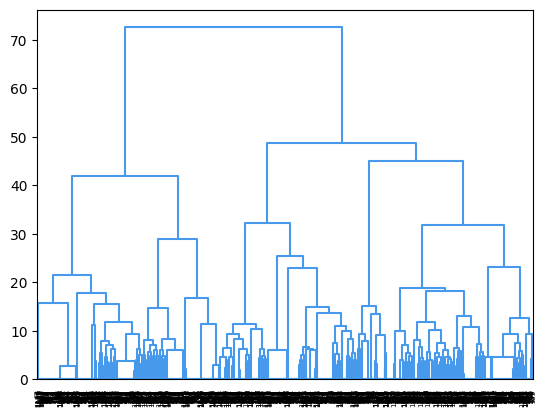

In [26]:
dendo=linkage(df_scaled, 'ward')
color = 'blue'
def color_func(x):
    rgb_color = (71, 153, 235)  # Por ejemplo, rojo en formato RGB
    hex_color = '#%02x%02x%02x' % rgb_color
    return hex_color

dendograma = sch.dendrogram(dendo, color_threshold=float('inf'), link_color_func=color_func)

### ***Cálculo de Sn***

Convertir el dendrograma en formato newick

In [27]:
def get_newick(node, parent_dist, leaf_names, newick='') -> str:
    """
    Convert sciply.cluster.hierarchy.to_tree()-output to Newick format.

    :param node: output of sciply.cluster.hierarchy.to_tree()
    :param parent_dist: output of sciply.cluster.hierarchy.to_tree().dist
    :param leaf_names: list of leaf names
    :param newick: leave empty, this variable is used in recursion.
    :returns: tree in Newick format
    """
    if node.is_leaf():
        return "%s:%.2f%s" % (leaf_names[node.id], parent_dist - node.dist, newick)
    else:
        if len(newick) > 0:
            newick = "):%.2f%s" % (parent_dist - node.dist, newick)
        else:
            newick = ");"
        newick = get_newick(node.get_left(), node.dist, leaf_names, newick=newick)
        newick = get_newick(node.get_right(), node.dist, leaf_names, newick=",%s" % (newick))
        newick = "(%s" % (newick)
        return newick

Convertir el dendrograma en cadena de texto

In [29]:
import ete3

def convertir_a_Tree(dendo, leaf_names):
    """
    Convierte la salida de scipy.cluster.hierarchy.to_tree a un objeto ete3.Tree.
    """
    tree1 = hierarchy.to_tree(dendo, False)
    newick_tree1 = get_newick(tree1, tree1.dist, leaf_names)
    tree = ete3.Tree(newick_tree1)

    return tree


arbol_resultante = convertir_a_Tree(dendo,leaf_names=range(0,1175))
print(arbol_resultante.write(format=9))

(((((((((553,497),(((130,90),291),968)),(((((((((((((53,51),77),438),500),757),825),884),933),935),1035),1077),1165),1171)),((((((((483,365),631),(288,230)),(562,56)),(1167,907)),((((379,106),683),((783,91),262)),(((922,833),832),(707,518)))),(((835,283),790),142)),((((774,196),930),988),((((((((((((((((((((((((((((((((((((((((((((((((((23,19),25),76),118),156),176),180),263),271),275),313),317),376),410),414),417),452),468),476),490),506),523),543),554),559),594),656),670),703),767),786),796),816),846),868),871),883),896),960),963),995),1023),1038),1039),1049),1054),1059),1071),1098),1142)))),((731,11),((((((((((((((184,182),198),214),312),445),541),691),713),741),924),984),1018),1029),1062))),(((((((((1169,50),763),((921,813),((446,248),1154))),(((958,72),501),(780,216))),((((668,639),1157),((737,498),167)),718)),((((((((((((((((((((((((((((((66,39),192),226),266),305),351),412),470),496),503),516),525),567),575),622),636),665),745),775),809),815),854),856),942),970),1031),1048),1064

Hallar todos los subárboles del dendrograma

In [30]:
from ete3 import Tree

def asignar_nombres(arbol):

    for i, nodo in enumerate(arbol.traverse()):  #Asigna nombres a los nodos si no tienen uno
        if not nodo.name:
            nodo.name = f"Nodo_{i}"

def obtener_subarboles(arbol):
    subarboles = []  #Inicializa una lista para almacenar los subárboles

    for nodo in arbol.traverse():  #Busca nodos descendientes del nodo iterado
        nodos_descendientes = arbol.search_nodes(name=nodo.name, order=1)

        subarbol = Tree()  #Construye un nuevo árbol con el nodo como raíz y sus descendientes
        subarbol.add_child(nodo.copy())

        for descendiente in nodos_descendientes:
            subarbol.add_child(descendiente.copy())

        subarboles.append(subarbol)

    return subarboles

#Función para obtener la representación en formato de texto de un subárbol
def obtener_texto(subarbol):
    return subarbol.write(format=9)

asignar_nombres(arbol_resultante)
todos_subarboles = obtener_subarboles(arbol_resultante)

# Imprimir la representación en formato de texto de cada subárbol
#for i, subarbol in enumerate(todos_subarboles):
 #   print(f"Subárbol {i + 1} - Representación en formato de texto:")
  #  print(obtener_texto(subarbol))
   # print("\n")

Determinar los n-subárboles

In [31]:
def obtener_n_subarboles(subarboles, max_n=100):
    """
    Obtiene la lista de n-subárboles para cada valor de n hasta max_n.
    """
    n_subarboles = []

    for n in range(1, max_n + 1):
        n_subarbol = []
        for subarbol in subarboles:
            if len(subarbol) <= n:
                n_subarbol.append(subarbol)
        n_subarboles.append((n, n_subarbol))

    return n_subarboles

In [35]:
n_subs = obtener_n_subarboles(todos_subarboles,1175)
#for n, subarboles in n_subs:
 #   print(f"Subárboles con tamaño {n}:")
  #  for subarbol in subarboles:
   #     print(obtener_texto(subarbol))
    #print("\n")

Determinar los n-subárboles maximales

In [36]:
def es_contenido(subarbol1, subarbol2):
    """
    Verifica si subarbol1 está contenido en subarbol2.
    """
    raiz_subarbol1 = subarbol1.children[0]   #Obtiene el nodo raíz del subarbol1, accediendo al primer hijo del subárbol

    for nodo_subarbol2 in subarbol2.traverse():  #Itera sobre los nodos del subarbol2
        if nodo_subarbol2.name == raiz_subarbol1.name:  #Verifica si el nombre del nodo raíz de subarbol1 está en subarbol2
            return True
            break
    return False


def obtener_maximales(n_subarboles):
    """
    Obtiene los n-subarboles maximales a partir de la lista de n-subarboles.
    """
    maximales = []  #Inicializa una lista para los maximales en cada n
    subarboles_no_maximales = set()

    for n, subarboles in n_subarboles:
        subarboles_maximales = []  #Inicializa una lista para los maximales

        if n == 1:  #Los 1-subárboles siempre son maximales
            subarboles_maximales.extend(subarboles)
            maximales.append((n, subarboles_maximales))
        else:
            for subarbol in subarboles:
                if len(subarbol.get_leaf_names()) == n:  #Los n-subárboles con exactamente n hojas siempre son maximales
                    subarboles_maximales.append(subarbol)
                else:
                    es_maximal = True
                    for otro_subarbol in subarboles:  #Comprueba si el subárbol está contenido en otro subárbol
                        if subarbol != otro_subarbol and es_contenido(subarbol, otro_subarbol):
                            es_maximal = False
                            subarboles_no_maximales.add(subarbol)  #Agrega el subárbol no maximal al conjunto para no volver a revisarlo después
                            break

                    if es_maximal and subarbol not in subarboles_no_maximales:  #Verifica si es maximal y no se ha marcado como no maximal antes
                        subarboles_maximales.append(subarbol)

            maximales.append((n, subarboles_maximales))

    return maximales

maximales = obtener_maximales(n_subs)

# Imprimir o procesar la lista de n-subarboles maximales
#for n, subarboles in maximales:
 #   print(f"Subárboles maximales con tamaño {n}:")
  #  for subarbol in subarboles:
   #     print(obtener_texto(subarbol))
    #print("\n")

Calcular Sn

In [37]:
def calcular_sn(maximales):
    """
    Calcula y devuelve la lista Sn a partir de la lista de n-subárboles maximales.
    """
    Sn = []  # Inicializa la lista para los valores de Sn

    for n, subarboles in maximales:
        Sj = len(subarboles)  # Inicializa con la cantidad de n-subárboles maximales
        for subarbol in subarboles:
            Sj *= len(subarbol)  # Actualiza Sj con el valor de la operación
        Sn.append((n, Sj))

    return Sn

Sn = calcular_sn(maximales)
# Imprimir la lista Sn
for n, s in Sn:
    subindice = ''.join(chr(0x2080 + int(digito)) for digito in str(n))
    print(f"S{subindice}:", s)

S₁: 1175
S₂: 193805516080063768583429998441536700597160224347827065585664
S₃: 1200465867874995344266013796020494872614364655230173473244666368471650608873472
S₄: 143679457328159713652977349094272649823016922585566058769300826124271215364719947808768
S₅: 109854705729185722736899522560000000000000000000000000000000000000000000000000000000000000
S₆: 1547921658852498250455292927852683422751419072472873400723218785894400000000000000000000000
S₇: 275928915153873112234827335846589428880280190441117475714874700503890001920000000000000000
S₈: 293526423218166587868883353597278459321966302064868007333604620480252005580800000000000000
S₉: 158318697978249001187283381336937840433830456641046992221775186251140185037209600000000000
S₁₀: 31009720418721696762972501954452231965743513600000000000000000000000000000000000000000000
S₁₁: 8712424335346986147271713900341192696821528844789285471603658370287717580800000000000000
S₁₂: 47031689116913590424205108614880188231788486186945980387742949440084770816000000

Encontrar el máximo y el n asociado

In [ ]:
def encontrar_maximo_valor(Sn):
    maximo_valor = max(Sn, key=lambda x: x[1])
    print(f"Valor máximo en Sn: {maximo_valor}")

    k = maximo_valor[0]
    print(f"El valor de n es {k}")

encontrar_maximo_valor(Sn)

Valor máximo en Sn: (4, 6255800255250432)
El valor de n es 4


### ***Base topológica***

Función que agrupa el valor de Sn, n y la base, 3 codigos anteriores

In [38]:
def base_topologica(Sn, maximales):
    """
    Encuentra el valor máximo en Sn y los subárboles maximales correspondientes.
    Imprime la base topológica y devuelve la lista Base.
    """
    maximo_valor = max(Sn, key=lambda x: x[1])
    k = maximo_valor[0]

    n_subarboles_maximales = None

    for n, subarboles in maximales:
        if n == k:
            n_subarboles_maximales = subarboles
            break

    print(f"Valor máximo en Sn: {maximo_valor}")
    print(f"El valor de n es {k}")

    Base = []

    for subarbol in n_subarboles_maximales:
        y = []
        for node in subarbol.traverse():
            if node.is_leaf():
                elem = node.name
                y.append(elem)
        Base.append(y)

    subindice_k = ''.join(chr(0x2080 + int(digito)) for digito in str(k))
    print(f"Base topológica B{subindice_k}: {Base}")

    return Base



# Llamada a la función y asignación del resultado a la variable 'base_resultado'
Base_resultados=base_topologica(Sn, maximales)

Valor máximo en Sn: (6, 1547921658852498250455292927852683422751419072472873400723218785894400000000000000000000000)
El valor de n es 6
Base topológica B₆: [['253', '41'], ['1082'], ['1168'], ['489', '92'], ['62'], ['731', '11'], ['911'], ['941', '971', '97', '686', '432'], ['408', '1100', '54', '784', '529'], ['1135'], ['1147'], ['699', '420', '1133', '1070', '864', '601'], ['1057'], ['1112', '45'], ['1153'], ['869'], ['913', '874', '259', '140'], ['213', '145'], ['1128', '857', '768', '306'], ['1156'], ['1138'], ['1126'], ['553', '497', '968', '291', '130', '90'], ['1062'], ['221'], ['715', '332'], ['853'], ['910'], ['773', '680', '542', '255', '200', '28'], ['982'], ['994'], ['1110'], ['1131'], ['43', '1028', '434', '181', '582', '381'], ['1033'], ['999'], ['992', '918', '628', '282'], ['1173'], ['1148'], ['1130'], ['1149'], ['119', '584', '838', '623', '430'], ['803', '237'], ['504'], ['1111'], ['1151'], ['1043'], ['1116'], ['1171'], ['142', '790', '835', '283'], ['988', '930', '77

In [ ]:
A = ['4','9','18','42','43','46','79','84','98']
#A = ['12','38','59','65','95']

### ***Puntos de la base***

Para el subconjunto A

***Exterior***

In [42]:
def exterior(Base, conjunto,df):
    """
    Calcula y muestra la extensión.
    """
    Ext = []

    for i in Base:
        if not any(elem in conjunto for elem in i):
            Ext.extend(i)

    Ext_enteros = [int(elemento) for elemento in Ext]
    tabla = df.loc[Ext_enteros]

    print(f"Ext({'A'})= {Ext}")
    return tabla

***Interior***

In [43]:
def interior(Base,conjunto,df):
    Int = []

    for i in Base:
        if all(elem in conjunto for elem in i):
            Int.extend(i)

    Int_enteros = [int(elemento) for elemento in Int]
    tabla = df.loc[Int_enteros]

    print(f"Int({'A'}) = {Int}")
    return tabla

***Adherencia***

In [44]:
def adherencia(Base,A,df):
        Adh = []

        for i in Base:
          if any(elem in A for elem in i):
           Adh.extend(i)

        Adh_enteros = [int(elemento) for elemento in Adh]
        tabla = df.loc[Adh_enteros]

        print(f"{'A'}'= {Adh}")
        return tabla


***Límite***

In [45]:
def limite(Base,A,df):
  Lim = []

  for i in Base:
    for m in i:
      if any(elem in A for elem in i if elem != m):
        Lim.append(m)

  Lim_enteros = [int(elemento) for elemento in Lim]
  tabla = df.loc[Lim_enteros]

  print(f"{'A'}'= {Lim}")
  return tabla


***Frontera***

In [46]:
def frontera(Base,A,df):
  Fr = []

  for i in Base:
      if any(elem in A for elem in i) and any(elem not in A for elem in i):
          Fr.extend(i)

  Fr_enteros = [int(elemento) for elemento in Fr]
  tabla = df.loc[Fr_enteros]

  print(f"Fr({A})= {Fr}")
  return tabla

#frontera(Base_resultados,A)

### ***Análisis topológico***

In [ ]:
#Para poder convertir age en cadena de texto
ndf['age'] = ndf['age'].astype(str, errors='raise')

Tomar los diferentes rangos de edades como subconjuntos a estudiar

In [ ]:
categorias_unicas = df['age'].unique()
print(categorias_unicas)

['19-25' '12-18' '33-40' '60+' '26-32' '40-50' '50-60']


In [39]:
edades1 = dfprueba[dfprueba['age']=='12-18']
edades1

,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
4,12-18,7,4,0.5,4,5,-0.5,0.0,0.0,0.5,0.0,0.5
9,12-18,4,5,1.5,2,5,-1.0,-0.5,1.0,0.0,-1.0,0.5
18,12-18,5,4,0.5,3,3,0.0,-0.5,0.5,1.0,0.0,0.5
42,12-18,7,4,0.5,4,5,-0.5,0.0,0.0,0.5,0.0,0.5
43,12-18,9,7,0.5,3,2,-0.5,0.5,1.0,1.0,-0.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1058,12-18,5,4,0.5,3,2,0.0,-0.5,0.0,0.5,-0.5,0.0
1073,12-18,5,7,0.5,4,5,0.0,0.0,-0.5,0.5,-0.5,-0.5
1075,12-18,5,4,0.5,3,2,0.0,-0.5,0.0,0.5,-0.5,0.0
1086,12-18,7,5,0.5,3,4,0.0,0.5,0.5,0.5,-0.5,0.5


In [40]:
A1 = list(edades1.index.astype(str))
A1

['4',
 '9',
 '18',
 '42',
 '43',
 '46',
 '79',
 '84',
 '98',
 '104',
 '119',
 '134',
 '149',
 '150',
 '181',
 '221',
 '248',
 '253',
 '270',
 '282',
 '302',
 '316',
 '323',
 '339',
 '341',
 '355',
 '369',
 '370',
 '399',
 '415',
 '416',
 '454',
 '460',
 '484',
 '488',
 '499',
 '502',
 '540',
 '546',
 '553',
 '555',
 '576',
 '582',
 '604',
 '612',
 '615',
 '651',
 '723',
 '727',
 '751',
 '769',
 '789',
 '813',
 '814',
 '817',
 '880',
 '887',
 '918',
 '921',
 '923',
 '929',
 '931',
 '938',
 '997',
 '1017',
 '1021',
 '1025',
 '1027',
 '1028',
 '1058',
 '1073',
 '1075',
 '1086',
 '1169']

Puntos de A1

In [47]:
interior(Base_resultados,A1,dfprueba)

Int(A) = ['221', '1075', '370', '814', '1058', '651', '887', '555', '817', '540', '789', '488', '502', '460', '415', '323', '302', '149', '612', '369', '355', '341', '134', '42', '4', '416']


,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
221,12-18,12,12,0.5,5,5,-1.0,0.0,0.0,0.0,0.0,0.0
1075,12-18,5,4,0.5,3,2,0.0,-0.5,0.0,0.5,-0.5,0.0
370,12-18,7,7,0.5,1,4,-0.5,-0.5,1.0,1.0,1.0,1.0
814,12-18,7,4,0.5,4,5,-0.5,0.0,0.0,0.5,0.0,0.5
1058,12-18,5,4,0.5,3,2,0.0,-0.5,0.0,0.5,-0.5,0.0
651,12-18,7,4,0.5,4,5,-0.5,0.0,0.0,0.5,0.0,0.5
887,12-18,5,4,0.5,3,2,0.0,-0.5,0.0,0.5,-0.5,0.0
555,12-18,7,4,0.5,4,5,-0.5,0.0,0.0,0.5,0.0,0.5
817,12-18,5,4,0.5,3,2,0.0,-0.5,0.0,0.5,-0.5,0.0
540,12-18,7,4,0.5,4,5,-0.5,0.0,0.0,0.5,0.0,0.5


In [48]:
exterior(Base_resultados,A1,dfprueba)

Ext(A)= ['1082', '1168', '489', '92', '62', '731', '11', '911', '941', '971', '97', '686', '432', '408', '1100', '54', '784', '529', '1135', '1147', '699', '420', '1133', '1070', '864', '601', '1057', '1112', '45', '1153', '869', '913', '874', '259', '140', '213', '145', '1128', '857', '768', '306', '1156', '1138', '1126', '1062', '715', '332', '853', '910', '773', '680', '542', '255', '200', '28', '982', '994', '1110', '1131', '1033', '999', '1173', '1148', '1130', '1149', '803', '237', '504', '1111', '1151', '1043', '1116', '1171', '142', '790', '835', '283', '988', '930', '774', '196', '1029', '447', '684', '1136', '372', '1101', '459', '934', '753', '990', '1172', '1050', '1120', '20', '395', '610', '409', '1022', '437', '861', '1145', '959', '164', '99', '548', '806', '1162', '1161', '1005', '989', '549', '1074', '1076', '1125', '1140', '493', '260', '83', '1004', '356', '443', '290', '336', '1020', '10', '657', '17', '1117', '116', '530', '366', '107', '785', '464', '944', '217',

,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
1082,19-25,11,5,0.5,2,4,-1.0,0.5,1.0,1.0,0.5,1.0
1168,26-32,9,7,0.5,1,1,1.0,1.0,1.0,1.0,1.0,1.0
489,40-50,9,9,1.5,1,1,1.0,0.5,1.0,1.0,0.5,0.5
92,19-25,7,11,1.5,1,2,1.0,0.5,1.0,1.0,0.5,1.0
62,50-60,5,11,0.5,1,1,0.5,0.5,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
76,50-60,7,9,0.5,4,4,-0.5,-0.5,-0.5,-1.0,-0.5,-0.5
25,50-60,7,9,0.5,4,4,-0.5,-0.5,-0.5,-1.0,-0.5,-0.5
23,50-60,7,9,0.5,4,4,-0.5,-0.5,-0.5,-1.0,-0.5,-0.5
19,50-60,7,9,0.5,4,4,-0.5,-0.5,-0.5,-1.0,-0.5,-0.5


In [49]:
adherencia(Base_resultados,A1,dfprueba)

A'= ['253', '41', '553', '497', '968', '291', '130', '90', '221', '43', '1028', '434', '181', '582', '381', '992', '918', '628', '282', '119', '584', '838', '623', '430', '1027', '1124', '923', '75', '1114', '287', '727', '608', '79', '576', '104', '755', '8', '1006', '110', '49', '98', '18', '1075', '399', '723', '403', '719', '484', '426', '377', '405', '270', '766', '14', '370', '581', '533', '258', '974', '499', '69', '1017', '210', '906', '604', '9', '339', '3', '647', '875', '769', '814', '1139', '241', '637', '309', '150', '710', '46', '279', '234', '1058', '931', '839', '592', '645', '57', '885', '929', '333', '1102', '475', '750', '454', '212', '316', '1155', '820', '651', '887', '239', '1123', '449', '1007', '84', '763', '1169', '50', '921', '813', '1154', '446', '248', '997', '860', '1095', '615', '1010', '614', '1073', '231', '938', '697', '555', '801', '294', '244', '1021', '36', '817', '1146', '880', '235', '873', '546', '80', '540', '789', '1086', '890', '858', '1025', '

,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
253,12-18,7,12,1.5,1,3,1.0,-1.0,0.0,-1.0,1.0,-0.5
41,19-25,7,7,0.5,2,2,1.0,-1.0,-1.0,-1.0,1.0,-1.0
553,12-18,9,11,1.5,2,4,0.0,-1.0,1.0,0.5,-1.0,-1.0
497,19-25,7,9,1.5,5,5,-1.0,-1.0,0.5,0.5,-1.0,-1.0
968,19-25,7,11,0.5,5,4,0.0,-1.0,1.0,-0.5,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
341,12-18,7,4,0.5,4,5,-0.5,0.0,0.0,0.5,0.0,0.5
134,12-18,7,4,0.5,4,5,-0.5,0.0,0.0,0.5,0.0,0.5
42,12-18,7,4,0.5,4,5,-0.5,0.0,0.0,0.5,0.0,0.5
4,12-18,7,4,0.5,4,5,-0.5,0.0,0.0,0.5,0.0,0.5


In [50]:
limite(Base_resultados,A1,dfprueba)

A'= ['41', '497', '968', '291', '130', '90', '43', '1028', '434', '181', '582', '381', '992', '918', '628', '282', '584', '838', '623', '430', '1027', '1124', '923', '75', '1114', '287', '608', '79', '576', '104', '755', '8', '1006', '110', '49', '98', '18', '399', '723', '403', '719', '426', '377', '405', '766', '14', '581', '533', '258', '974', '69', '210', '906', '604', '9', '339', '3', '647', '875', '1139', '241', '637', '309', '710', '279', '234', '839', '592', '645', '57', '885', '333', '1102', '475', '750', '454', '212', '316', '1155', '820', '239', '1123', '449', '1007', '763', '50', '921', '813', '1154', '446', '248', '997', '860', '1095', '615', '1010', '614', '1073', '231', '938', '697', '801', '294', '244', '36', '1146', '235', '873', '80', '890', '858', '1025', '26', '1060', '751', '502', '460', '415', '323', '302', '149', '369', '355', '341', '134', '42', '4']


,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
41,19-25,7,7,0.5,2,2,1.0,-1.0,-1.0,-1.0,1.0,-1.0
497,19-25,7,9,1.5,5,5,-1.0,-1.0,0.5,0.5,-1.0,-1.0
968,19-25,7,11,0.5,5,4,0.0,-1.0,1.0,-0.5,-1.0,-1.0
291,19-25,7,11,0.5,5,4,0.0,-1.0,1.0,-0.5,-1.0,-1.0
130,19-25,7,11,0.5,5,4,0.0,-1.0,1.0,-0.5,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
355,12-18,7,4,0.5,4,5,-0.5,0.0,0.0,0.5,0.0,0.5
341,12-18,7,4,0.5,4,5,-0.5,0.0,0.0,0.5,0.0,0.5
134,12-18,7,4,0.5,4,5,-0.5,0.0,0.0,0.5,0.0,0.5
42,12-18,7,4,0.5,4,5,-0.5,0.0,0.0,0.5,0.0,0.5


In [51]:
frontera(Base_resultados,A1,dfprueba)

Fr(['4', '9', '18', '42', '43', '46', '79', '84', '98', '104', '119', '134', '149', '150', '181', '221', '248', '253', '270', '282', '302', '316', '323', '339', '341', '355', '369', '370', '399', '415', '416', '454', '460', '484', '488', '499', '502', '540', '546', '553', '555', '576', '582', '604', '612', '615', '651', '723', '727', '751', '769', '789', '813', '814', '817', '880', '887', '918', '921', '923', '929', '931', '938', '997', '1017', '1021', '1025', '1027', '1028', '1058', '1073', '1075', '1086', '1169'])= ['253', '41', '553', '497', '968', '291', '130', '90', '43', '1028', '434', '181', '582', '381', '992', '918', '628', '282', '119', '584', '838', '623', '430', '1027', '1124', '923', '75', '1114', '287', '727', '608', '79', '576', '104', '755', '8', '1006', '110', '49', '98', '18', '399', '723', '403', '719', '484', '426', '377', '405', '270', '766', '14', '581', '533', '258', '974', '499', '69', '1017', '210', '906', '604', '9', '339', '3', '647', '875', '769', '1139', '2

,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
253,12-18,7,12,1.5,1,3,1.0,-1.0,0.0,-1.0,1.0,-0.5
41,19-25,7,7,0.5,2,2,1.0,-1.0,-1.0,-1.0,1.0,-1.0
553,12-18,9,11,1.5,2,4,0.0,-1.0,1.0,0.5,-1.0,-1.0
497,19-25,7,9,1.5,5,5,-1.0,-1.0,0.5,0.5,-1.0,-1.0
968,19-25,7,11,0.5,5,4,0.0,-1.0,1.0,-0.5,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
858,33-40,7,5,0.5,2,3,0.0,-0.5,0.5,0.5,-0.5,0.5
1025,12-18,7,5,0.5,2,3,0.0,0.0,0.0,0.0,0.0,0.0
26,19-25,5,4,0.5,2,3,0.0,-0.5,0.0,0.0,0.0,0.0
1060,19-25,5,5,0.5,3,3,0.0,0.0,0.0,0.0,0.0,0.0


Edades 2

In [52]:
edades2 = dfprueba[dfprueba['age']=='19-25']
#n = len(edades1)
edades2

,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
2,19-25,7,4,1.5,1,1,1.0,1.0,1.0,1.0,1.0,1.0
3,19-25,7,4,0.5,3,4,-0.5,-1.0,0.5,0.5,-0.5,0.5
7,19-25,7,4,0.5,1,1,0.0,0.0,0.5,0.5,0.5,0.0
8,19-25,5,5,0.5,1,2,-0.5,-1.0,0.5,0.5,0.5,1.0
14,19-25,9,7,0.5,5,3,0.5,0.5,1.0,1.0,1.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...
1158,19-25,5,9,0.5,1,2,1.0,1.0,1.0,1.0,1.0,1.0
1161,19-25,9,4,0.5,2,2,0.5,-0.5,0.0,1.0,-1.0,-0.5
1162,19-25,7,4,0.5,2,3,0.0,-1.0,0.0,0.0,0.0,0.0
1163,19-25,11,7,2.5,1,1,0.5,1.0,0.5,1.0,1.0,1.0


In [53]:
B1 = list(edades2.index.astype(str))

In [54]:
interior(Base_resultados,B1,dfprueba)

Int(A) = ['1082', '911', '699', '420', '1133', '1070', '864', '601', '1057', '913', '874', '259', '140', '1128', '857', '768', '306', '910', '1033', '999', '803', '237', '504', '1111', '142', '790', '835', '283', '988', '930', '774', '196', '753', '1022', '437', '861', '1145', '959', '164', '99', '548', '806', '1162', '1161', '1005', '989', '549', '1117', '116', '785', '464', '944', '217', '1103', '1013', '624', '364', '289', '117', '1107', '507', '397', '635', '618', '293', '265', '920', '778', '788', '535', '358', '269', '243', '173', '1011', '1166', '343', '220', '185', '101', '811', '1079', '848', '367', '311', '1081', '335', '1089', '44', '1158', '980', '939', '560', '1065', '832', '707', '518', '922', '833', '718', '812', '640', '252', '761', '580', '945', '492', '969', '961', '695', '478', '350', '1105', '889', '692', '1163', '329', '338', '310', '597', '579', '843', '593', '222', '455', '120', '661', '457', '345', '276', '242', '73', '1056', '154', '139', '96', '93', '70', '67'

,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
1082,19-25,11,5,0.5,2,4,-1.0,0.5,1.0,1.0,0.5,1.0
911,19-25,11,12,3.0,3,4,0.5,-1.0,0.0,-0.5,-1.0,-0.5
699,19-25,11,5,0.5,5,2,0.0,0.0,1.0,1.0,0.5,1.0
420,19-25,7,4,0.5,4,1,-0.5,-0.5,1.0,1.0,1.0,1.0
1133,19-25,7,7,0.5,2,1,-0.5,0.0,0.5,1.0,0.5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
127,19-25,7,4,0.5,1,1,0.0,0.0,0.5,0.5,0.5,0.0
78,19-25,7,4,0.5,1,1,0.0,0.0,0.5,0.5,0.5,0.0
68,19-25,7,4,0.5,1,1,0.0,0.0,0.5,0.5,0.5,0.0
7,19-25,7,4,0.5,1,1,0.0,0.0,0.5,0.5,0.5,0.0


In [55]:
exterior(Base_resultados,B1,dfprueba)

Ext(A)= ['1168', '62', '1135', '1147', '1153', '869', '213', '145', '1156', '1138', '1126', '1062', '221', '715', '332', '853', '773', '680', '542', '255', '200', '28', '982', '994', '1110', '1131', '1173', '1148', '1130', '1149', '1151', '1043', '1116', '1171', '1029', '1101', '459', '934', '990', '1172', '1050', '1120', '1075', '1074', '1076', '1125', '1140', '443', '290', '530', '366', '107', '370', '1083', '1040', '1113', '1165', '1142', '1018', '647', '875', '769', '814', '407', '1159', '1099', '957', '836', '1160', '1164', '937', '1097', '956', '391', '1132', '764', '1170', '710', '46', '279', '234', '986', '1119', '1174', '1058', '1024', '1069', '1121', '1080', '1118', '1003', '1036', '1094', '1077', '1167', '907', '1098', '984', '1143', '651', '690', '467', '442', '425', '296', '100', '905', '849', '831', '726', '666', '280', '144', '928', '799', '1141', '1152', '912', '1078', '1122', '1096', '22', '679', '514', '985', '1088', '1150', '887', '1019', '1042', '1109', '1072', '105

,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
1168,26-32,9,7,0.5,1,1,1.0,1.0,1.0,1.0,1.0,1.0
62,50-60,5,11,0.5,1,1,0.5,0.5,1.0,1.0,1.0,0.0
1135,26-32,9,11,0.5,1,5,1.0,-1.0,0.5,0.5,0.0,0.0
1147,50-60,5,12,0.5,1,2,1.0,-0.5,-0.5,-0.5,-0.5,-0.5
1153,33-40,7,5,1.5,4,3,-1.0,0.5,0.0,1.0,0.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
76,50-60,7,9,0.5,4,4,-0.5,-0.5,-0.5,-1.0,-0.5,-0.5
25,50-60,7,9,0.5,4,4,-0.5,-0.5,-0.5,-1.0,-0.5,-0.5
23,50-60,7,9,0.5,4,4,-0.5,-0.5,-0.5,-1.0,-0.5,-0.5
19,50-60,7,9,0.5,4,4,-0.5,-0.5,-0.5,-1.0,-0.5,-0.5


In [57]:
adherencia(Base_resultados,B1,dfprueba)

A'= ['253', '41', '1082', '489', '92', '731', '11', '911', '941', '971', '97', '686', '432', '408', '1100', '54', '784', '529', '699', '420', '1133', '1070', '864', '601', '1057', '1112', '45', '913', '874', '259', '140', '1128', '857', '768', '306', '553', '497', '968', '291', '130', '90', '910', '43', '1028', '434', '181', '582', '381', '1033', '999', '992', '918', '628', '282', '119', '584', '838', '623', '430', '803', '237', '504', '1111', '142', '790', '835', '283', '988', '930', '774', '196', '447', '684', '1136', '372', '753', '1027', '1124', '923', '75', '1114', '287', '727', '608', '20', '395', '610', '409', '1022', '79', '576', '104', '755', '8', '437', '861', '1145', '959', '164', '99', '548', '806', '1162', '1161', '1005', '989', '549', '1006', '110', '49', '98', '18', '493', '260', '83', '1004', '356', '336', '1020', '10', '657', '17', '1117', '116', '785', '464', '944', '217', '399', '723', '403', '1087', '406', '706', '136', '371', '1084', '561', '719', '484', '426', '37

,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
253,12-18,7,12,1.5,1,3,1.0,-1.0,0.0,-1.0,1.0,-0.5
41,19-25,7,7,0.5,2,2,1.0,-1.0,-1.0,-1.0,1.0,-1.0
1082,19-25,11,5,0.5,2,4,-1.0,0.5,1.0,1.0,0.5,1.0
489,40-50,9,9,1.5,1,1,1.0,0.5,1.0,1.0,0.5,0.5
92,19-25,7,11,1.5,1,2,1.0,0.5,1.0,1.0,0.5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
127,19-25,7,4,0.5,1,1,0.0,0.0,0.5,0.5,0.5,0.0
78,19-25,7,4,0.5,1,1,0.0,0.0,0.5,0.5,0.5,0.0
68,19-25,7,4,0.5,1,1,0.0,0.0,0.5,0.5,0.5,0.0
7,19-25,7,4,0.5,1,1,0.0,0.0,0.5,0.5,0.5,0.0


In [58]:
limite(Base_resultados,B1,dfprueba)

A'= ['253', '489', '11', '971', '97', '686', '432', '408', '1100', '54', '784', '529', '699', '420', '1133', '1070', '864', '601', '1112', '913', '874', '259', '140', '1128', '857', '768', '306', '553', '497', '968', '291', '130', '90', '43', '1028', '181', '582', '381', '918', '628', '282', '119', '584', '838', '623', '430', '803', '237', '142', '790', '835', '283', '988', '930', '774', '196', '447', '684', '1136', '372', '1027', '923', '75', '1114', '287', '727', '608', '20', '395', '610', '409', '79', '576', '104', '755', '8', '437', '861', '1145', '959', '164', '99', '1161', '1005', '989', '549', '1006', '110', '49', '98', '18', '493', '83', '1004', '356', '1020', '10', '657', '17', '1117', '116', '785', '464', '944', '217', '399', '723', '1087', '406', '706', '136', '371', '561', '719', '484', '426', '377', '1115', '987', '721', '613', '954', '571', '725', '15', '698', '495', '881', '147', '405', '270', '766', '14', '1103', '1013', '624', '364', '289', '117', '581', '533', '258', 

,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
253,12-18,7,12,1.5,1,3,1.0,-1.0,0.0,-1.0,1.0,-0.5
489,40-50,9,9,1.5,1,1,1.0,0.5,1.0,1.0,0.5,0.5
11,50-60,5,5,0.5,3,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
971,33-40,11,11,2.5,4,4,0.0,0.0,0.0,-1.0,0.0,-1.0
97,33-40,11,11,2.5,4,4,0.0,0.0,0.0,-1.0,0.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
128,19-25,7,4,0.5,1,1,0.0,0.0,0.5,0.5,0.5,0.0
127,19-25,7,4,0.5,1,1,0.0,0.0,0.5,0.5,0.5,0.0
78,19-25,7,4,0.5,1,1,0.0,0.0,0.5,0.5,0.5,0.0
68,19-25,7,4,0.5,1,1,0.0,0.0,0.5,0.5,0.5,0.0


In [59]:
frontera(Base_resultados,B1,dfprueba)

Fr(['2', '3', '7', '8', '14', '20', '24', '26', '35', '36', '41', '44', '45', '48', '49', '50', '52', '56', '67', '68', '69', '70', '73', '78', '80', '90', '92', '93', '94', '96', '99', '101', '106', '110', '115', '116', '117', '120', '124', '127', '128', '130', '131', '133', '136', '138', '139', '140', '141', '142', '143', '146', '151', '154', '155', '160', '161', '164', '167', '168', '172', '173', '185', '189', '193', '194', '195', '196', '201', '210', '212', '215', '216', '217', '220', '222', '227', '231', '235', '237', '239', '241', '242', '243', '252', '258', '259', '260', '262', '265', '269', '274', '276', '281', '283', '287', '288', '289', '291', '293', '301', '306', '307', '308', '310', '311', '318', '329', '331', '333', '335', '336', '338', '343', '345', '350', '358', '363', '364', '365', '367', '377', '379', '380', '382', '388', '395', '397', '398', '401', '403', '405', '406', '420', '426', '429', '434', '437', '446', '447', '449', '455', '457', '461', '462', '464', '475', '4

,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
253,12-18,7,12,1.5,1,3,1.0,-1.0,0.0,-1.0,1.0,-0.5
41,19-25,7,7,0.5,2,2,1.0,-1.0,-1.0,-1.0,1.0,-1.0
489,40-50,9,9,1.5,1,1,1.0,0.5,1.0,1.0,0.5,0.5
92,19-25,7,11,1.5,1,2,1.0,0.5,1.0,1.0,0.5,1.0
731,19-25,4,7,0.5,5,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
858,33-40,7,5,0.5,2,3,0.0,-0.5,0.5,0.5,-0.5,0.5
1025,12-18,7,5,0.5,2,3,0.0,0.0,0.0,0.0,0.0,0.0
26,19-25,5,4,0.5,2,3,0.0,-0.5,0.0,0.0,0.0,0.0
1060,19-25,5,5,0.5,3,3,0.0,0.0,0.0,0.0,0.0,0.0


Edades 3

In [60]:
edades3 = dfprueba[dfprueba['age']=='26-32']
#n = len(edades1)
edades3

,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
1,26-32,9,7,0.5,1,1,1.0,1.0,1.0,1.0,1.0,1.0
10,26-32,11,11,2.5,2,2,0.0,0.0,0.0,0.0,0.0,0.0
15,26-32,9,11,1.5,3,2,0.5,1.0,0.0,1.0,0.5,0.5
28,26-32,11,12,0.5,3,3,0.0,0.0,-1.0,-1.0,0.0,0.0
37,26-32,5,9,1.5,2,2,0.5,0.5,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1156,26-32,9,7,0.5,1,1,1.0,1.0,1.0,1.0,1.0,1.0
1165,26-32,5,12,0.5,3,5,-0.5,-1.0,-0.5,0.0,-0.5,-0.5
1167,26-32,9,12,0.5,2,5,-1.0,-1.0,-1.0,0.5,-1.0,-1.0
1168,26-32,9,7,0.5,1,1,1.0,1.0,1.0,1.0,1.0,1.0


In [61]:
C1 = list(edades3.index.astype(str))

In [62]:
interior(Base_resultados,C1,dfprueba)

Int(A) = ['1168', '1135', '213', '145', '1156', '1138', '1126', '773', '680', '542', '255', '200', '28', '982', '994', '1110', '1151', '1043', '1116', '1171', '990', '1050', '530', '366', '107', '1083', '1040', '1113', '1165', '957', '937', '986', '1003', '1036', '1094', '1077', '1167', '907', '690', '467', '442', '425', '296', '100', '905', '849', '831', '726', '666', '280', '144', '928', '912', '1122', '985', '973', '998', '1093', '1035', '701', '646', '565', '440', '384', '58', '1092', '900', '1034', '967', '1051', '1014', '834', '520', '121', '113', '1104', '859', '962', '1091', '935', '899', '964', '897', '805', '936', '1067', '933', '876', '888', '863', '793', '916', '1052', '884', '319', '314', '219', '158', '125', '111', '609', '840', '787', '776', '866', '1046', '757', '500', '438', '77', '53', '51', '825', '712', '716', '739', '842', '1045', '673', '606', '728', '827', '1012', '583', '508', '334', '303', '169', '82', '620', '603', '724', '771', '991', '568', '688', '762', '97

,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
1168,26-32,9,7,0.5,1,1,1.0,1.0,1.0,1.0,1.0,1.0
1135,26-32,9,11,0.5,1,5,1.0,-1.0,0.5,0.5,0.0,0.0
213,26-32,11,12,3.0,2,3,1.0,0.0,0.5,0.5,0.5,-0.5
145,26-32,11,12,3.0,2,3,1.0,0.0,0.5,0.5,0.5,-0.5
1156,26-32,9,7,0.5,1,1,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
87,26-32,5,9,1.5,2,2,0.5,0.5,1.0,1.0,1.0,0.0
85,26-32,5,9,1.5,2,2,0.5,0.5,1.0,1.0,1.0,0.0
60,26-32,5,9,1.5,2,2,0.5,0.5,1.0,1.0,1.0,0.0
37,26-32,5,9,1.5,2,2,0.5,0.5,1.0,1.0,1.0,0.0


In [63]:
exterior(Base_resultados,C1,dfprueba)

Ext(A)= ['253', '41', '1082', '489', '92', '62', '731', '11', '911', '941', '971', '97', '686', '432', '1147', '699', '420', '1133', '1070', '864', '601', '1057', '1112', '45', '1153', '869', '913', '874', '259', '140', '1128', '857', '768', '306', '553', '497', '968', '291', '130', '90', '1062', '221', '853', '910', '1131', '43', '1028', '434', '181', '582', '381', '1033', '999', '992', '918', '628', '282', '1173', '1148', '1130', '1149', '119', '584', '838', '623', '430', '803', '237', '504', '1111', '142', '790', '835', '283', '988', '930', '774', '196', '1029', '447', '684', '1136', '372', '1101', '459', '934', '753', '1172', '1027', '1124', '923', '1120', '75', '1114', '287', '727', '608', '20', '395', '610', '409', '1022', '79', '576', '104', '755', '8', '437', '861', '1145', '959', '164', '99', '548', '806', '1162', '1161', '1005', '989', '549', '1006', '110', '49', '98', '18', '1075', '1074', '1076', '1125', '1140', '493', '260', '83', '1004', '356', '443', '290', '1117', '116'

,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
253,12-18,7,12,1.5,1,3,1.0,-1.0,0.0,-1.0,1.0,-0.5
41,19-25,7,7,0.5,2,2,1.0,-1.0,-1.0,-1.0,1.0,-1.0
1082,19-25,11,5,0.5,2,4,-1.0,0.5,1.0,1.0,0.5,1.0
489,40-50,9,9,1.5,1,1,1.0,0.5,1.0,1.0,0.5,0.5
92,19-25,7,11,1.5,1,2,1.0,0.5,1.0,1.0,0.5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
76,50-60,7,9,0.5,4,4,-0.5,-0.5,-0.5,-1.0,-0.5,-0.5
25,50-60,7,9,0.5,4,4,-0.5,-0.5,-0.5,-1.0,-0.5,-0.5
23,50-60,7,9,0.5,4,4,-0.5,-0.5,-0.5,-1.0,-0.5,-0.5
19,50-60,7,9,0.5,4,4,-0.5,-0.5,-0.5,-1.0,-0.5,-0.5


In [64]:
adherencia(Base_resultados,C1,dfprueba)

A'= ['1168', '408', '1100', '54', '784', '529', '1135', '213', '145', '1156', '1138', '1126', '715', '332', '773', '680', '542', '255', '200', '28', '982', '994', '1110', '1151', '1043', '1116', '1171', '990', '1050', '336', '1020', '10', '657', '17', '530', '366', '107', '1115', '987', '721', '725', '15', '698', '495', '881', '147', '1083', '1040', '1113', '1165', '644', '738', '509', '978', '879', '957', '937', '956', '391', '1132', '764', '710', '46', '279', '234', '986', '931', '839', '592', '645', '57', '1003', '1036', '1094', '1077', '1167', '907', '683', '262', '379', '106', '783', '91', '501', '780', '216', '958', '72', '308', '1108', '599', '479', '885', '929', '333', '1102', '475', '690', '467', '442', '425', '296', '100', '905', '849', '831', '726', '666', '280', '144', '928', '912', '324', '709', '352', '797', '607', '1122', '510', '321', '1134', '168', '985', '590', '382', '52', '161', '2', '973', '998', '1093', '1035', '562', '56', '763', '1169', '50', '701', '646', '565'

,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
1168,26-32,9,7,0.5,1,1,1.0,1.0,1.0,1.0,1.0,1.0
408,40-50,9,9,2.5,2,4,-0.5,0.0,-1.0,-0.5,0.0,0.0
1100,19-25,7,11,3.0,2,2,0.0,-0.5,-1.0,-1.0,-0.5,-1.0
54,40-50,7,12,2.5,4,3,-0.5,-1.0,-0.5,-1.0,-1.0,-0.5
784,19-25,7,12,3.0,3,3,-0.5,-0.5,-0.5,0.5,-0.5,-0.5
...,...,...,...,...,...,...,...,...,...,...,...,...
87,26-32,5,9,1.5,2,2,0.5,0.5,1.0,1.0,1.0,0.0
85,26-32,5,9,1.5,2,2,0.5,0.5,1.0,1.0,1.0,0.0
60,26-32,5,9,1.5,2,2,0.5,0.5,1.0,1.0,1.0,0.0
37,26-32,5,9,1.5,2,2,0.5,0.5,1.0,1.0,1.0,0.0


In [65]:
limite(Base_resultados,C1,dfprueba)

A'= ['408', '1100', '54', '784', '213', '145', '332', '773', '680', '542', '255', '200', '28', '336', '1020', '657', '17', '530', '366', '107', '1115', '721', '725', '698', '495', '881', '147', '644', '738', '509', '879', '956', '391', '1132', '710', '46', '234', '931', '839', '592', '645', '1167', '907', '683', '262', '379', '106', '91', '501', '780', '216', '958', '308', '1108', '599', '929', '333', '1102', '475', '690', '467', '442', '425', '296', '100', '849', '831', '726', '666', '280', '144', '324', '709', '352', '797', '607', '510', '1134', '168', '382', '52', '161', '2', '56', '1169', '50', '701', '646', '565', '440', '384', '58', '1051', '1014', '834', '520', '121', '113', '1061', '151', '855', '1106', '368', '672', '730', '792', '669', '981', '867', '777', '526', '319', '314', '219', '158', '125', '111', '757', '500', '438', '77', '53', '51', '583', '508', '334', '303', '169', '82', '204', '171', '126', '114', '61', '47', '218', '175', '103', '81', '63', '1', '251', '224', '1

,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
408,40-50,9,9,2.5,2,4,-0.5,0.0,-1.0,-0.5,0.0,0.0
1100,19-25,7,11,3.0,2,2,0.0,-0.5,-1.0,-1.0,-0.5,-1.0
54,40-50,7,12,2.5,4,3,-0.5,-1.0,-0.5,-1.0,-1.0,-0.5
784,19-25,7,12,3.0,3,3,-0.5,-0.5,-0.5,0.5,-0.5,-0.5
213,26-32,11,12,3.0,2,3,1.0,0.0,0.5,0.5,0.5,-0.5
...,...,...,...,...,...,...,...,...,...,...,...,...
105,26-32,5,9,1.5,2,2,0.5,0.5,1.0,1.0,1.0,0.0
87,26-32,5,9,1.5,2,2,0.5,0.5,1.0,1.0,1.0,0.0
85,26-32,5,9,1.5,2,2,0.5,0.5,1.0,1.0,1.0,0.0
60,26-32,5,9,1.5,2,2,0.5,0.5,1.0,1.0,1.0,0.0


In [66]:
frontera(Base_resultados,C1,dfprueba)

Fr(['1', '10', '15', '28', '37', '47', '51', '53', '57', '58', '60', '61', '63', '72', '74', '77', '81', '82', '85', '87', '100', '103', '105', '107', '109', '111', '113', '114', '121', '122', '123', '125', '126', '132', '144', '145', '158', '162', '163', '169', '171', '174', '175', '190', '191', '197', '200', '204', '209', '213', '218', '219', '223', '224', '229', '236', '240', '251', '255', '261', '279', '280', '284', '286', '296', '297', '299', '303', '304', '314', '319', '321', '325', '326', '334', '337', '344', '349', '352', '353', '354', '366', '375', '383', '384', '385', '387', '389', '390', '396', '413', '419', '424', '425', '431', '435', '436', '438', '439', '440', '441', '442', '444', '451', '456', '463', '467', '471', '477', '479', '481', '485', '491', '500', '505', '508', '520', '524', '529', '530', '534', '542', '552', '562', '564', '565', '566', '568', '570', '583', '585', '586', '587', '590', '603', '606', '607', '609', '620', '630', '643', '646', '648', '653', '660', '6

,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
408,40-50,9,9,2.5,2,4,-0.5,0.0,-1.0,-0.5,0.0,0.0
1100,19-25,7,11,3.0,2,2,0.0,-0.5,-1.0,-1.0,-0.5,-1.0
54,40-50,7,12,2.5,4,3,-0.5,-1.0,-0.5,-1.0,-1.0,-0.5
784,19-25,7,12,3.0,3,3,-0.5,-0.5,-0.5,0.5,-0.5,-0.5
529,26-32,9,12,2.5,3,3,-0.5,0.0,-1.0,0.0,0.0,-0.5
...,...,...,...,...,...,...,...,...,...,...,...,...
564,26-32,7,9,0.5,3,4,0.5,-0.5,-0.5,-1.0,-0.5,-0.5
981,19-25,7,9,0.5,3,2,0.0,-0.5,-0.5,-1.0,-0.5,0.0
867,19-25,7,9,0.5,3,2,0.0,-0.5,-0.5,-1.0,-0.5,0.0
777,19-25,7,9,0.5,3,2,0.0,-0.5,-0.5,-1.0,-0.5,0.0


Edades 4

In [67]:
edades4 = dfprueba[dfprueba['age']=='33-40']
#n = len(edades1)
edades4

,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
13,33-40,7,5,1.5,4,3,-1.0,0.5,0.0,1.0,0.5,0.0
29,33-40,7,5,1.5,4,3,-1.0,0.5,0.0,1.0,0.5,0.0
30,33-40,9,9,0.5,5,5,-1.0,0.0,0.5,0.5,-0.5,0.0
31,33-40,7,5,1.5,4,3,-1.0,0.5,0.0,1.0,0.5,0.0
33,33-40,7,5,1.5,4,3,-1.0,0.5,0.0,1.0,0.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1112,33-40,5,7,2.5,4,4,-0.5,0.5,0.5,0.5,1.0,0.5
1143,33-40,5,7,1.5,4,4,-0.5,0.0,-0.5,0.5,-0.5,0.0
1148,33-40,7,5,1.5,4,3,-1.0,0.5,0.0,1.0,0.5,0.0
1153,33-40,7,5,1.5,4,3,-1.0,0.5,0.0,1.0,0.5,0.0


In [68]:
D1 = list(edades4.index.astype(str))

In [69]:
interior(Base_resultados,D1,dfprueba)

Int(A) = ['1153', '1148', '1101', '459', '1076', '836', '1170', '1069', '1143', '799', '1096', '1042', '1064', '779', '1085', '1008', '1048', '616', '772', '627', '596', '203', '179', '137', '914', '966', '1031', '494', '404', '328', '135', '34', '30', '572', '943', '970', '925', '942', '852', '856', '824', '854', '821', '815', '795', '809', '734', '775', '632', '745', '626', '665', '602', '636', '393', '622', '378', '575', '373', '567', '362', '525', '273', '159', '33', '31', '29', '13', '347', '516', '503', '496', '470', '412', '305', '266', '226', '192', '66', '39', '351']


,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
1153,33-40,7,5,1.5,4,3,-1.0,0.5,0.0,1.0,0.5,0.0
1148,33-40,7,5,1.5,4,3,-1.0,0.5,0.0,1.0,0.5,0.0
1101,33-40,9,9,0.5,5,5,-1.0,0.0,0.5,0.5,-0.5,0.0
459,33-40,11,12,1.5,3,1,0.0,-1.0,-1.0,-1.0,-1.0,-1.0
1076,33-40,7,5,1.5,4,3,-1.0,0.5,0.0,1.0,0.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
226,33-40,5,7,1.5,4,4,-0.5,0.0,-0.5,0.5,-0.5,0.0
192,33-40,5,7,1.5,4,4,-0.5,0.0,-0.5,0.5,-0.5,0.0
66,33-40,5,7,1.5,4,4,-0.5,0.0,-0.5,0.5,-0.5,0.0
39,33-40,5,7,1.5,4,4,-0.5,0.0,-0.5,0.5,-0.5,0.0


In [70]:
exterior(Base_resultados,D1,dfprueba)

Ext(A)= ['253', '41', '1082', '1168', '489', '92', '62', '731', '11', '911', '408', '1100', '54', '784', '529', '1135', '1147', '699', '420', '1133', '1070', '864', '601', '1057', '869', '913', '874', '259', '140', '213', '145', '1128', '857', '768', '306', '1156', '1138', '1126', '553', '497', '968', '291', '130', '90', '1062', '221', '715', '332', '853', '910', '773', '680', '542', '255', '200', '28', '982', '994', '1110', '1131', '1033', '999', '1173', '1130', '1149', '803', '237', '504', '1111', '1151', '1043', '1116', '1171', '142', '790', '835', '283', '988', '930', '774', '196', '1029', '447', '684', '1136', '372', '934', '753', '990', '1172', '1027', '1124', '923', '1050', '1120', '75', '1114', '287', '727', '608', '20', '395', '610', '409', '1022', '79', '576', '104', '755', '8', '437', '861', '1145', '959', '164', '99', '548', '806', '1162', '1161', '1005', '989', '549', '1006', '110', '49', '98', '18', '1075', '1074', '1125', '1140', '443', '290', '1117', '116', '530', '366'

,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
253,12-18,7,12,1.5,1,3,1.0,-1.0,0.0,-1.0,1.0,-0.5
41,19-25,7,7,0.5,2,2,1.0,-1.0,-1.0,-1.0,1.0,-1.0
1082,19-25,11,5,0.5,2,4,-1.0,0.5,1.0,1.0,0.5,1.0
1168,26-32,9,7,0.5,1,1,1.0,1.0,1.0,1.0,1.0,1.0
489,40-50,9,9,1.5,1,1,1.0,0.5,1.0,1.0,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...
76,50-60,7,9,0.5,4,4,-0.5,-0.5,-0.5,-1.0,-0.5,-0.5
25,50-60,7,9,0.5,4,4,-0.5,-0.5,-0.5,-1.0,-0.5,-0.5
23,50-60,7,9,0.5,4,4,-0.5,-0.5,-0.5,-1.0,-0.5,-0.5
19,50-60,7,9,0.5,4,4,-0.5,-0.5,-0.5,-1.0,-0.5,-0.5


In [71]:
adherencia(Base_resultados,D1,dfprueba)

A'= ['941', '971', '97', '686', '432', '1112', '45', '1153', '43', '1028', '434', '181', '582', '381', '992', '918', '628', '282', '1148', '119', '584', '838', '623', '430', '1101', '459', '1076', '493', '260', '83', '1004', '356', '336', '1020', '10', '657', '17', '725', '15', '698', '495', '881', '147', '644', '738', '509', '978', '879', '836', '1170', '1069', '683', '262', '379', '106', '783', '91', '501', '780', '216', '958', '72', '1157', '167', '668', '639', '737', '498', '1143', '521', '705', '247', '903', '380', '799', '1096', '510', '321', '1134', '168', '22', '679', '514', '1042', '1064', '779', '1085', '1008', '1048', '616', '1137', '1090', '272', '772', '627', '596', '203', '179', '137', '914', '966', '1031', '1086', '890', '858', '494', '404', '328', '135', '34', '30', '572', '943', '970', '925', '942', '852', '856', '824', '854', '821', '815', '795', '809', '734', '775', '632', '745', '626', '665', '602', '636', '393', '622', '378', '575', '373', '567', '362', '525', '273

,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
941,19-25,7,11,0.5,4,5,0.0,1.0,0.5,-1.0,-1.0,-1.0
971,33-40,11,11,2.5,4,4,0.0,0.0,0.0,-1.0,0.0,-1.0
97,33-40,11,11,2.5,4,4,0.0,0.0,0.0,-1.0,0.0,-1.0
686,40-50,9,12,1.5,3,3,0.0,0.5,-1.0,-1.0,-1.0,-1.0
432,40-50,9,12,1.5,3,3,0.0,0.5,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
226,33-40,5,7,1.5,4,4,-0.5,0.0,-0.5,0.5,-0.5,0.0
192,33-40,5,7,1.5,4,4,-0.5,0.0,-0.5,0.5,-0.5,0.0
66,33-40,5,7,1.5,4,4,-0.5,0.0,-0.5,0.5,-0.5,0.0
39,33-40,5,7,1.5,4,4,-0.5,0.0,-0.5,0.5,-0.5,0.0


In [72]:
frontera(Base_resultados,D1,dfprueba)

Fr(['13', '29', '30', '31', '33', '34', '39', '66', '91', '97', '135', '137', '147', '159', '179', '192', '203', '226', '247', '266', '272', '273', '305', '328', '347', '351', '362', '373', '378', '381', '393', '404', '412', '459', '470', '493', '494', '496', '501', '503', '510', '514', '516', '525', '567', '572', '575', '584', '596', '602', '616', '622', '626', '627', '628', '632', '636', '665', '668', '679', '725', '734', '738', '745', '772', '775', '779', '795', '799', '809', '815', '821', '824', '836', '852', '854', '856', '858', '879', '914', '925', '942', '943', '966', '970', '971', '1008', '1020', '1031', '1042', '1048', '1064', '1069', '1076', '1085', '1096', '1101', '1112', '1143', '1148', '1153', '1170'])= ['941', '971', '97', '686', '432', '1112', '45', '43', '1028', '434', '181', '582', '381', '992', '918', '628', '282', '119', '584', '838', '623', '430', '493', '260', '83', '1004', '356', '336', '1020', '10', '657', '17', '725', '15', '698', '495', '881', '147', '644', '73

,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
941,19-25,7,11,0.5,4,5,0.0,1.0,0.5,-1.0,-1.0,-1.0
971,33-40,11,11,2.5,4,4,0.0,0.0,0.0,-1.0,0.0,-1.0
97,33-40,11,11,2.5,4,4,0.0,0.0,0.0,-1.0,0.0,-1.0
686,40-50,9,12,1.5,3,3,0.0,0.5,-1.0,-1.0,-1.0,-1.0
432,40-50,9,12,1.5,3,3,0.0,0.5,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1090,50-60,9,12,0.5,1,2,0.0,-0.5,0.5,0.5,0.0,-0.5
272,33-40,9,11,0.5,1,2,0.0,-1.0,0.0,0.0,0.0,-0.5
1086,12-18,7,5,0.5,3,4,0.0,0.5,0.5,0.5,-0.5,0.5
890,19-25,7,7,0.5,3,3,-0.5,0.0,0.5,0.5,-0.5,0.5


In [73]:
limite(Base_resultados,D1,dfprueba)

A'= ['941', '971', '97', '686', '432', '45', '43', '1028', '434', '181', '582', '992', '918', '282', '119', '838', '623', '430', '260', '83', '1004', '356', '336', '10', '657', '17', '725', '15', '698', '495', '881', '147', '644', '738', '509', '978', '879', '683', '262', '379', '106', '783', '780', '216', '958', '72', '1157', '167', '639', '737', '498', '521', '705', '903', '380', '321', '1134', '168', '22', '679', '514', '1137', '1090', '772', '627', '596', '203', '179', '137', '1086', '890', '494', '404', '328', '135', '34', '30', '273', '159', '33', '31', '29', '13', '305', '266', '226', '192', '66', '39']


,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
941,19-25,7,11,0.5,4,5,0.0,1.0,0.5,-1.0,-1.0,-1.0
971,33-40,11,11,2.5,4,4,0.0,0.0,0.0,-1.0,0.0,-1.0
97,33-40,11,11,2.5,4,4,0.0,0.0,0.0,-1.0,0.0,-1.0
686,40-50,9,12,1.5,3,3,0.0,0.5,-1.0,-1.0,-1.0,-1.0
432,40-50,9,12,1.5,3,3,0.0,0.5,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
266,33-40,5,7,1.5,4,4,-0.5,0.0,-0.5,0.5,-0.5,0.0
226,33-40,5,7,1.5,4,4,-0.5,0.0,-0.5,0.5,-0.5,0.0
192,33-40,5,7,1.5,4,4,-0.5,0.0,-0.5,0.5,-0.5,0.0
66,33-40,5,7,1.5,4,4,-0.5,0.0,-0.5,0.5,-0.5,0.0


In [74]:
edades5 = dfprueba[dfprueba['age']=='40-50']
#n = len(edades1)
edades5

,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
0,40-50,12,12,1.5,3,2,-0.5,-0.5,-1.0,-1.0,-1.0,-0.5
5,40-50,9,9,0.5,2,1,0.5,-0.5,-0.5,0.5,0.0,0.0
6,40-50,9,9,0.5,2,1,0.5,-0.5,-0.5,0.5,0.0,0.0
16,40-50,9,9,0.5,2,1,0.5,-0.5,-0.5,0.5,0.0,0.0
21,40-50,12,12,1.5,3,2,-0.5,-0.5,-1.0,-1.0,-1.0,-0.5
...,...,...,...,...,...,...,...,...,...,...,...,...
1149,40-50,9,9,2.5,2,2,0.0,0.0,0.5,0.5,0.5,0.5
1150,40-50,5,5,0.5,2,2,0.5,-0.5,0.5,0.5,0.5,0.5
1160,40-50,12,12,1.5,3,2,-0.5,-0.5,-1.0,-1.0,-1.0,-0.5
1172,40-50,9,9,0.5,2,1,0.5,-0.5,-0.5,0.5,0.0,0.0


In [75]:
E1 = list(edades5.index.astype(str))

In [76]:
interior(Base_resultados,E1,dfprueba)

Int(A) = ['1149', '1172', '1140', '1160', '1097', '1174', '1080', '1118', '1141', '1078', '1150', '1072', '1055', '1129', '1066', '1127', '1009', '1032', '1063', '1041', '965', '1002', '1026', '1037', '915', '895', '983', '996', '932', '886', '894', '955', '909', '826', '877', '878', '950', '851', '720', '837', '800', '949', '810', '675', '829', '629', '522', '466', '433', '233', '102', '663', '862', '804', '655', '819', '798', '791', '652', '818', '749', '752', '642', '807', '747', '700', '588', '744', '746', '693', '267', '177', '166', '108', '21', '0', '487', '740', '702', '685', '694', '674', '625', '578', '654', '598', '538', '634', '591', '537', '617', '532', '519', '577', '531', '473', '556', '515', '469', '527', '512', '453', '486', '474', '418', '450', '472', '361', '386', '465', '346', '357', '428', '327', '348', '400', '315', '330', '394', '298', '256', '342', '225', '232', '340', '188', '187', '27', '16', '6', '5', '199', '211', '157', '152', '129', '112', '64', '228', '322

,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
1149,40-50,9,9,2.5,2,2,0.0,0.0,0.5,0.5,0.5,0.5
1172,40-50,9,9,0.5,2,1,0.5,-0.5,-0.5,0.5,0.0,0.0
1140,40-50,9,9,2.5,2,2,0.0,0.0,0.5,0.5,0.5,0.5
1160,40-50,12,12,1.5,3,2,-0.5,-0.5,-1.0,-1.0,-1.0,-0.5
1097,40-50,9,9,0.5,2,1,0.5,-0.5,-0.5,0.5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
88,40-50,7,7,0.5,1,3,0.5,0.5,0.5,0.5,0.5,0.5
86,40-50,7,7,0.5,1,3,0.5,0.5,0.5,0.5,0.5,0.5
71,40-50,7,7,0.5,1,3,0.5,0.5,0.5,0.5,0.5,0.5
40,40-50,7,7,0.5,1,3,0.5,0.5,0.5,0.5,0.5,0.5


In [77]:
exterior(Base_resultados,E1,dfprueba)

Ext(A)= ['253', '41', '1082', '1168', '62', '731', '11', '911', '1135', '1147', '699', '420', '1133', '1070', '864', '601', '1057', '1112', '45', '1153', '869', '913', '874', '259', '140', '213', '145', '1128', '857', '768', '306', '1156', '1138', '1126', '553', '497', '968', '291', '130', '90', '1062', '221', '853', '910', '773', '680', '542', '255', '200', '28', '982', '994', '1110', '1131', '43', '1028', '434', '181', '582', '381', '1033', '999', '992', '918', '628', '282', '1173', '1148', '1130', '803', '237', '504', '1111', '1151', '1043', '1116', '1171', '142', '790', '835', '283', '988', '930', '774', '196', '1029', '1101', '459', '934', '753', '990', '1027', '1124', '923', '1050', '1120', '75', '1114', '287', '727', '608', '1022', '79', '576', '104', '755', '8', '437', '861', '1145', '959', '164', '99', '548', '806', '1162', '1161', '1005', '989', '549', '1006', '110', '49', '98', '18', '1075', '1074', '1076', '1125', '336', '1020', '10', '657', '17', '1117', '116', '530', '366

,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
253,12-18,7,12,1.5,1,3,1.0,-1.0,0.0,-1.0,1.0,-0.5
41,19-25,7,7,0.5,2,2,1.0,-1.0,-1.0,-1.0,1.0,-1.0
1082,19-25,11,5,0.5,2,4,-1.0,0.5,1.0,1.0,0.5,1.0
1168,26-32,9,7,0.5,1,1,1.0,1.0,1.0,1.0,1.0,1.0
62,50-60,5,11,0.5,1,1,0.5,0.5,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
76,50-60,7,9,0.5,4,4,-0.5,-0.5,-0.5,-1.0,-0.5,-0.5
25,50-60,7,9,0.5,4,4,-0.5,-0.5,-0.5,-1.0,-0.5,-0.5
23,50-60,7,9,0.5,4,4,-0.5,-0.5,-0.5,-1.0,-0.5,-0.5
19,50-60,7,9,0.5,4,4,-0.5,-0.5,-0.5,-1.0,-0.5,-0.5


In [78]:
adherencia(Base_resultados,E1,dfprueba)

A'= ['489', '92', '941', '971', '97', '686', '432', '408', '1100', '54', '784', '529', '715', '332', '1149', '119', '584', '838', '623', '430', '447', '684', '1136', '372', '1172', '20', '395', '610', '409', '1140', '493', '260', '83', '1004', '356', '443', '290', '613', '954', '571', '725', '15', '698', '495', '881', '147', '644', '738', '509', '978', '879', '407', '1159', '1099', '1160', '1097', '956', '391', '1132', '764', '710', '46', '279', '234', '1174', '1080', '1118', '1141', '1078', '510', '321', '1134', '168', '22', '679', '514', '1150', '1072', '1055', '427', '649', '569', '631', '288', '230', '483', '365', '550', '462', '331', '55', '1129', '1066', '1127', '1009', '1032', '1063', '1061', '781', '151', '855', '1106', '368', '672', '730', '792', '660', '1041', '965', '1002', '1026', '1037', '915', '895', '983', '996', '932', '886', '894', '955', '909', '826', '877', '878', '950', '851', '720', '837', '800', '949', '810', '675', '829', '629', '522', '466', '433', '233', '102',

,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
489,40-50,9,9,1.5,1,1,1.0,0.5,1.0,1.0,0.5,0.5
92,19-25,7,11,1.5,1,2,1.0,0.5,1.0,1.0,0.5,1.0
941,19-25,7,11,0.5,4,5,0.0,1.0,0.5,-1.0,-1.0,-1.0
971,33-40,11,11,2.5,4,4,0.0,0.0,0.0,-1.0,0.0,-1.0
97,33-40,11,11,2.5,4,4,0.0,0.0,0.0,-1.0,0.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
88,40-50,7,7,0.5,1,3,0.5,0.5,0.5,0.5,0.5,0.5
86,40-50,7,7,0.5,1,3,0.5,0.5,0.5,0.5,0.5,0.5
71,40-50,7,7,0.5,1,3,0.5,0.5,0.5,0.5,0.5,0.5
40,40-50,7,7,0.5,1,3,0.5,0.5,0.5,0.5,0.5,0.5


In [79]:
limite(Base_resultados,E1,dfprueba)

A'= ['92', '941', '971', '97', '686', '432', '408', '1100', '54', '784', '529', '715', '119', '584', '838', '623', '447', '684', '1136', '20', '395', '610', '493', '260', '83', '1004', '356', '443', '613', '571', '725', '15', '495', '881', '147', '644', '738', '978', '879', '407', '1159', '1099', '956', '1132', '764', '710', '46', '279', '234', '510', '321', '168', '679', '514', '649', '569', '631', '288', '230', '483', '365', '550', '462', '331', '1061', '781', '151', '855', '1106', '368', '672', '730', '660', '629', '522', '466', '433', '233', '102', '267', '177', '166', '108', '21', '0', '188', '187', '27', '16', '6', '5', '211', '157', '152', '129', '112', '64', '205', '183', '88', '86', '71', '40']


,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
92,19-25,7,11,1.5,1,2,1.0,0.5,1.0,1.0,0.5,1.0
941,19-25,7,11,0.5,4,5,0.0,1.0,0.5,-1.0,-1.0,-1.0
971,33-40,11,11,2.5,4,4,0.0,0.0,0.0,-1.0,0.0,-1.0
97,33-40,11,11,2.5,4,4,0.0,0.0,0.0,-1.0,0.0,-1.0
686,40-50,9,12,1.5,3,3,0.0,0.5,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
183,40-50,7,7,0.5,1,3,0.5,0.5,0.5,0.5,0.5,0.5
88,40-50,7,7,0.5,1,3,0.5,0.5,0.5,0.5,0.5,0.5
86,40-50,7,7,0.5,1,3,0.5,0.5,0.5,0.5,0.5,0.5
71,40-50,7,7,0.5,1,3,0.5,0.5,0.5,0.5,0.5,0.5


In [80]:
frontera(Base_resultados,E1,dfprueba)

Fr(['0', '5', '6', '16', '21', '22', '27', '40', '54', '55', '64', '71', '83', '86', '88', '102', '108', '112', '129', '152', '157', '166', '177', '183', '187', '188', '199', '205', '207', '211', '225', '228', '230', '232', '233', '234', '246', '254', '256', '267', '268', '278', '285', '290', '298', '315', '322', '327', '330', '332', '340', '342', '346', '348', '357', '361', '368', '372', '386', '391', '394', '400', '407', '408', '409', '418', '427', '428', '430', '432', '433', '450', '453', '465', '466', '469', '472', '473', '474', '486', '487', '489', '509', '512', '515', '519', '522', '527', '531', '532', '537', '538', '556', '577', '578', '588', '591', '598', '617', '625', '629', '631', '634', '642', '652', '654', '655', '663', '674', '675', '685', '686', '693', '694', '698', '700', '702', '710', '720', '740', '744', '746', '747', '749', '752', '791', '792', '798', '800', '804', '807', '810', '818', '819', '826', '829', '837', '851', '862', '877', '878', '886', '894', '895', '909',

,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
489,40-50,9,9,1.5,1,1,1.0,0.5,1.0,1.0,0.5,0.5
92,19-25,7,11,1.5,1,2,1.0,0.5,1.0,1.0,0.5,1.0
941,19-25,7,11,0.5,4,5,0.0,1.0,0.5,-1.0,-1.0,-1.0
971,33-40,11,11,2.5,4,4,0.0,0.0,0.0,-1.0,0.0,-1.0
97,33-40,11,11,2.5,4,4,0.0,0.0,0.0,-1.0,0.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
368,40-50,9,12,0.5,2,3,0.0,-0.5,0.0,-0.5,-0.5,-0.5
672,19-25,5,12,0.5,2,3,0.0,-1.0,-0.5,0.0,-1.0,0.0
730,19-25,9,11,1.5,3,3,0.5,-1.0,-0.5,0.0,-1.0,0.0
792,40-50,7,9,0.5,3,3,0.0,-1.0,-0.5,0.0,-0.5,-0.5


In [81]:
edades6 = dfprueba[dfprueba['age']=='50-60']
#n = len(edades1)
edades6

,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
11,50-60,5,5,0.5,3,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
17,50-60,9,11,1.5,3,2,0.0,-0.5,0.5,0.0,0.0,0.0
19,50-60,7,9,0.5,4,4,-0.5,-0.5,-0.5,-1.0,-0.5,-0.5
23,50-60,7,9,0.5,4,4,-0.5,-0.5,-0.5,-1.0,-0.5,-0.5
25,50-60,7,9,0.5,4,4,-0.5,-0.5,-0.5,-1.0,-0.5,-0.5
...,...,...,...,...,...,...,...,...,...,...,...,...
1147,50-60,5,12,0.5,1,2,1.0,-0.5,-0.5,-0.5,-0.5,-0.5
1152,50-60,12,12,2.5,3,3,-0.5,-1.0,-1.0,-1.0,-1.0,-0.5
1159,50-60,9,9,1.5,2,5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5
1164,50-60,12,12,2.5,3,3,-0.5,-1.0,-1.0,-1.0,-1.0,-0.5


In [82]:
F1 = list(edades6.index.astype(str))

In [83]:
interior(Base_resultados,F1,dfprueba)

Int(A) = ['62', '1147', '1062', '1131', '1173', '1029', '1120', '1074', '1142', '1018', '1164', '1119', '1024', '1098', '984', '1152', '1088', '1019', '1071', '924', '1144', '1044', '1000', '1059', '741', '972', '977', '802', '1054', '713', '948', '976', '782', '1049', '691', '865', '951', '677', '1039', '445', '312', '214', '198', '184', '182', '541', '841', '947', '664', '1038', '830', '927', '539', '402', '264', '206', '170', '165', '650', '1023', '822', '926', '995', '808', '904', '963', '676', '901', '960', '558', '891', '896', '551', '870', '883', '480', '423', '421', '300', '153', '32', '528', '850', '871', '758', '868', '754', '846', '743', '816', '722', '796', '717', '786', '681', '767', '671', '703', '621', '670', '589', '656', '557', '594', '544', '559', '536', '554', '513', '543', '458', '523', '448', '506', '411', '490', '374', '476', '360', '468', '292', '452', '277', '417', '250', '414', '245', '238', '208', '202', '148', '89', '249', '410', '376', '317', '313', '275', '

,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
62,50-60,5,11,0.5,1,1,0.5,0.5,1.0,1.0,1.0,0.0
1147,50-60,5,12,0.5,1,2,1.0,-0.5,-0.5,-0.5,-0.5,-0.5
1062,50-60,4,4,0.5,1,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1131,50-60,5,12,0.5,1,2,1.0,-0.5,-0.5,-0.5,-0.5,-0.5
1173,50-60,7,7,2.5,5,4,-0.5,0.5,0.5,1.0,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...
76,50-60,7,9,0.5,4,4,-0.5,-0.5,-0.5,-1.0,-0.5,-0.5
25,50-60,7,9,0.5,4,4,-0.5,-0.5,-0.5,-1.0,-0.5,-0.5
23,50-60,7,9,0.5,4,4,-0.5,-0.5,-0.5,-1.0,-0.5,-0.5
19,50-60,7,9,0.5,4,4,-0.5,-0.5,-0.5,-1.0,-0.5,-0.5


In [84]:
exterior(Base_resultados,F1,dfprueba)

Ext(A)= ['253', '41', '1082', '1168', '489', '92', '911', '941', '971', '97', '686', '432', '408', '1100', '54', '784', '529', '1135', '699', '420', '1133', '1070', '864', '601', '1057', '1112', '45', '1153', '869', '913', '874', '259', '140', '213', '145', '1128', '857', '768', '306', '1156', '1138', '1126', '553', '497', '968', '291', '130', '90', '221', '715', '332', '853', '910', '773', '680', '542', '255', '200', '28', '982', '994', '1110', '43', '1028', '434', '181', '582', '381', '1033', '999', '992', '918', '628', '282', '1148', '1130', '1149', '119', '584', '838', '623', '430', '803', '237', '504', '1111', '1151', '1043', '1116', '1171', '142', '790', '835', '283', '988', '930', '774', '196', '1101', '459', '934', '753', '990', '1172', '1027', '1124', '923', '1050', '20', '395', '610', '409', '1022', '79', '576', '104', '755', '8', '437', '861', '1145', '959', '164', '99', '548', '806', '1162', '1161', '1005', '989', '549', '1006', '110', '49', '98', '18', '1075', '1076', '112

,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
253,12-18,7,12,1.5,1,3,1.0,-1.0,0.0,-1.0,1.0,-0.5
41,19-25,7,7,0.5,2,2,1.0,-1.0,-1.0,-1.0,1.0,-1.0
1082,19-25,11,5,0.5,2,4,-1.0,0.5,1.0,1.0,0.5,1.0
1168,26-32,9,7,0.5,1,1,1.0,1.0,1.0,1.0,1.0,1.0
489,40-50,9,9,1.5,1,1,1.0,0.5,1.0,1.0,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...
87,26-32,5,9,1.5,2,2,0.5,0.5,1.0,1.0,1.0,0.0
85,26-32,5,9,1.5,2,2,0.5,0.5,1.0,1.0,1.0,0.0
60,26-32,5,9,1.5,2,2,0.5,0.5,1.0,1.0,1.0,0.0
37,26-32,5,9,1.5,2,2,0.5,0.5,1.0,1.0,1.0,0.0


In [85]:
adherencia(Base_resultados,F1,dfprueba)

A'= ['62', '731', '11', '1147', '1062', '1131', '1173', '1029', '447', '684', '1136', '372', '1120', '75', '1114', '287', '727', '608', '1074', '493', '260', '83', '1004', '356', '443', '290', '336', '1020', '10', '657', '17', '1087', '406', '706', '136', '371', '1084', '561', '1142', '1018', '1139', '241', '637', '309', '150', '407', '1159', '1099', '1164', '956', '391', '1132', '764', '1119', '1024', '1098', '984', '1152', '324', '709', '352', '797', '607', '1088', '1019', '427', '649', '569', '1071', '924', '1144', '801', '294', '244', '1021', '36', '1016', '1001', '1030', '770', '711', '605', '1044', '1000', '1059', '741', '972', '1137', '1090', '272', '1061', '781', '151', '855', '1106', '368', '977', '802', '1054', '713', '948', '976', '782', '1049', '691', '865', '951', '677', '1039', '445', '312', '214', '198', '184', '182', '541', '841', '947', '664', '1038', '830', '927', '539', '402', '264', '206', '170', '165', '650', '1023', '822', '926', '995', '808', '904', '963', '676',

,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
62,50-60,5,11,0.5,1,1,0.5,0.5,1.0,1.0,1.0,0.0
731,19-25,4,7,0.5,5,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
11,50-60,5,5,0.5,3,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1147,50-60,5,12,0.5,1,2,1.0,-0.5,-0.5,-0.5,-0.5,-0.5
1062,50-60,4,4,0.5,1,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
76,50-60,7,9,0.5,4,4,-0.5,-0.5,-0.5,-1.0,-0.5,-0.5
25,50-60,7,9,0.5,4,4,-0.5,-0.5,-0.5,-1.0,-0.5,-0.5
23,50-60,7,9,0.5,4,4,-0.5,-0.5,-0.5,-1.0,-0.5,-0.5
19,50-60,7,9,0.5,4,4,-0.5,-0.5,-0.5,-1.0,-0.5,-0.5


In [86]:
limite(Base_resultados,F1,dfprueba)

A'= ['731', '447', '684', '372', '1114', '287', '727', '608', '493', '260', '83', '1004', '290', '336', '1020', '10', '657', '17', '406', '706', '136', '371', '1084', '561', '1139', '241', '637', '309', '150', '407', '1099', '956', '391', '1132', '764', '709', '352', '797', '607', '427', '569', '801', '294', '244', '1021', '36', '1016', '1030', '770', '711', '605', '1137', '272', '781', '151', '855', '1106', '368', '445', '312', '214', '198', '184', '182', '539', '402', '264', '206', '170', '165', '480', '423', '421', '300', '153', '32', '245', '238', '208', '202', '148', '89', '156', '118', '76', '25', '23', '19']


,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
731,19-25,4,7,0.5,5,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
447,19-25,7,12,0.5,5,5,0.0,-0.5,0.5,1.0,-1.0,0.5
684,19-25,9,11,0.5,4,5,0.0,-0.5,0.5,0.5,0.0,0.5
372,40-50,9,9,0.5,3,4,0.0,0.0,0.5,0.5,0.0,0.5
1114,19-25,9,4,0.5,3,2,-0.5,-0.5,0.5,0.5,0.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...
118,50-60,7,9,0.5,4,4,-0.5,-0.5,-0.5,-1.0,-0.5,-0.5
76,50-60,7,9,0.5,4,4,-0.5,-0.5,-0.5,-1.0,-0.5,-0.5
25,50-60,7,9,0.5,4,4,-0.5,-0.5,-0.5,-1.0,-0.5,-0.5
23,50-60,7,9,0.5,4,4,-0.5,-0.5,-0.5,-1.0,-0.5,-0.5


In [87]:
frontera(Base_resultados,F1,dfprueba)

Fr(['11', '17', '19', '23', '25', '32', '62', '75', '76', '89', '118', '148', '153', '156', '165', '170', '176', '180', '182', '184', '198', '202', '206', '208', '214', '238', '244', '245', '249', '250', '263', '264', '271', '275', '277', '292', '294', '300', '309', '312', '313', '317', '324', '356', '360', '371', '374', '376', '402', '410', '411', '414', '417', '421', '423', '443', '445', '448', '452', '458', '468', '476', '480', '490', '506', '513', '523', '528', '536', '539', '541', '543', '544', '551', '554', '557', '558', '559', '561', '589', '594', '621', '637', '649', '650', '656', '657', '664', '670', '671', '676', '677', '681', '691', '703', '713', '717', '722', '741', '743', '754', '758', '767', '782', '786', '796', '802', '808', '816', '822', '830', '841', '846', '850', '865', '868', '870', '871', '883', '891', '896', '901', '904', '924', '926', '927', '947', '948', '951', '956', '960', '963', '972', '976', '977', '984', '995', '1000', '1001', '1018', '1019', '1023', '1024',

,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
731,19-25,4,7,0.5,5,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
11,50-60,5,5,0.5,3,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
447,19-25,7,12,0.5,5,5,0.0,-0.5,0.5,1.0,-1.0,0.5
684,19-25,9,11,0.5,4,5,0.0,-0.5,0.5,0.5,0.0,0.5
1136,50-60,7,9,0.5,4,4,0.0,0.0,0.5,0.5,0.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...
781,26-32,9,12,0.5,3,3,0.0,-1.0,0.0,0.0,0.0,0.0
151,19-25,9,11,0.5,3,3,0.0,0.0,0.0,0.0,0.5,0.0
855,19-25,9,12,0.5,3,3,0.0,-0.5,-0.5,0.0,-0.5,-0.5
1106,40-50,9,11,0.5,3,2,0.0,-0.5,0.0,-0.5,-0.5,-0.5


In [88]:
edades7 = dfprueba[dfprueba['age']=='60+']
#n = len(edades1)
edades7

,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
12,60+,9,5,1.5,4,3,-1.0,1.0,1.0,1.0,1.0,1.0
38,60+,9,5,1.5,4,3,-1.0,1.0,1.0,1.0,1.0,1.0
59,60+,9,5,1.5,4,3,-1.0,1.0,1.0,1.0,1.0,1.0
65,60+,9,5,1.5,4,3,-1.0,1.0,1.0,1.0,1.0,1.0
95,60+,9,5,1.5,4,3,-1.0,1.0,1.0,1.0,1.0,1.0
178,60+,9,5,1.5,4,3,-1.0,1.0,1.0,1.0,1.0,1.0
186,60+,9,5,1.5,4,3,-1.0,1.0,1.0,1.0,1.0,1.0
257,60+,4,4,0.5,4,4,0.0,0.5,0.5,0.5,0.5,0.5
295,60+,9,5,1.5,4,3,-1.0,1.0,1.0,1.0,1.0,1.0
320,60+,9,5,1.5,4,3,-1.0,1.0,1.0,1.0,1.0,1.0


In [89]:
G1 = list(edades7.index.astype(str))

In [90]:
interior(Base_resultados,G1,dfprueba)

Int(A) = ['869', '853', '1130', '934', '1125', '1121', '1109', '1068', '1047', '1015', '993', '953', '823', '765', '756', '735', '714', '687', '667', '659', '641', '611', '600', '573', '547', '545', '517', '422', '392', '359', '320', '295', '178', '95', '65', '59', '38', '12', '186']


,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
869,60+,9,7,1.5,5,2,-0.5,1.0,1.0,1.0,1.0,1.0
853,60+,12,12,3.0,5,5,-1.0,-1.0,-1.0,-1.0,-1.0,0.0
1130,60+,9,5,1.5,4,3,-1.0,1.0,1.0,1.0,1.0,1.0
934,60+,12,12,3.0,1,2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1125,60+,9,5,1.5,4,3,-1.0,1.0,1.0,1.0,1.0,1.0
1121,60+,9,5,1.5,4,3,-1.0,1.0,1.0,1.0,1.0,1.0
1109,60+,9,5,1.5,4,3,-1.0,1.0,1.0,1.0,1.0,1.0
1068,60+,9,5,1.5,4,3,-1.0,1.0,1.0,1.0,1.0,1.0
1047,60+,9,5,1.5,4,3,-1.0,1.0,1.0,1.0,1.0,1.0
1015,60+,9,5,1.5,4,3,-1.0,1.0,1.0,1.0,1.0,1.0


In [91]:
exterior(Base_resultados,G1,dfprueba)

Ext(A)= ['253', '41', '1082', '1168', '489', '92', '62', '731', '11', '911', '941', '971', '97', '686', '432', '408', '1100', '54', '784', '529', '1135', '1147', '699', '420', '1133', '1070', '864', '601', '1057', '1112', '45', '1153', '913', '874', '259', '140', '213', '145', '1128', '857', '768', '306', '1156', '1138', '1126', '553', '497', '968', '291', '130', '90', '1062', '221', '715', '332', '910', '773', '680', '542', '255', '200', '28', '982', '994', '1110', '1131', '43', '1028', '434', '181', '582', '381', '1033', '999', '992', '918', '628', '282', '1173', '1148', '1149', '119', '584', '838', '623', '430', '803', '237', '504', '1111', '1151', '1043', '1116', '1171', '142', '790', '835', '283', '988', '930', '774', '196', '1029', '447', '684', '1136', '372', '1101', '459', '753', '990', '1172', '1027', '1124', '923', '1050', '1120', '75', '1114', '287', '727', '608', '20', '395', '610', '409', '1022', '79', '576', '104', '755', '8', '437', '861', '1145', '959', '164', '99', '54

,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
253,12-18,7,12,1.5,1,3,1.0,-1.0,0.0,-1.0,1.0,-0.5
41,19-25,7,7,0.5,2,2,1.0,-1.0,-1.0,-1.0,1.0,-1.0
1082,19-25,11,5,0.5,2,4,-1.0,0.5,1.0,1.0,0.5,1.0
1168,26-32,9,7,0.5,1,1,1.0,1.0,1.0,1.0,1.0,1.0
489,40-50,9,9,1.5,1,1,1.0,0.5,1.0,1.0,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...
76,50-60,7,9,0.5,4,4,-0.5,-0.5,-0.5,-1.0,-0.5,-0.5
25,50-60,7,9,0.5,4,4,-0.5,-0.5,-0.5,-1.0,-0.5,-0.5
23,50-60,7,9,0.5,4,4,-0.5,-0.5,-0.5,-1.0,-0.5,-0.5
19,50-60,7,9,0.5,4,4,-0.5,-0.5,-0.5,-1.0,-0.5,-0.5


In [92]:
adherencia(Base_resultados,G1,dfprueba)

A'= ['869', '853', '1130', '934', '1125', '647', '875', '769', '1121', '1109', '682', '257', '1068', '1047', '1015', '993', '953', '823', '765', '756', '735', '714', '687', '667', '659', '641', '611', '600', '573', '547', '545', '517', '422', '392', '359', '320', '295', '178', '95', '65', '59', '38', '12', '186']


,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
869,60+,9,7,1.5,5,2,-0.5,1.0,1.0,1.0,1.0,1.0
853,60+,12,12,3.0,5,5,-1.0,-1.0,-1.0,-1.0,-1.0,0.0
1130,60+,9,5,1.5,4,3,-1.0,1.0,1.0,1.0,1.0,1.0
934,60+,12,12,3.0,1,2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1125,60+,9,5,1.5,4,3,-1.0,1.0,1.0,1.0,1.0,1.0
647,60+,4,4,0.5,5,2,-1.0,1.0,1.0,1.0,1.0,1.0
875,60+,4,4,1.5,5,5,-0.5,1.0,1.0,1.0,1.0,1.0
769,12-18,5,4,0.5,5,5,-1.0,0.0,0.0,1.0,1.0,1.0
1121,60+,9,5,1.5,4,3,-1.0,1.0,1.0,1.0,1.0,1.0
1109,60+,9,5,1.5,4,3,-1.0,1.0,1.0,1.0,1.0,1.0


In [93]:
limite(Base_resultados,G1,dfprueba)

A'= ['647', '875', '769', '682', '178', '95', '65', '59', '38', '12']


,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
647,60+,4,4,0.5,5,2,-1.0,1.0,1.0,1.0,1.0,1.0
875,60+,4,4,1.5,5,5,-0.5,1.0,1.0,1.0,1.0,1.0
769,12-18,5,4,0.5,5,5,-1.0,0.0,0.0,1.0,1.0,1.0
682,19-25,4,5,0.5,4,4,0.5,0.5,1.0,0.0,-0.5,0.5
178,60+,9,5,1.5,4,3,-1.0,1.0,1.0,1.0,1.0,1.0
95,60+,9,5,1.5,4,3,-1.0,1.0,1.0,1.0,1.0,1.0
65,60+,9,5,1.5,4,3,-1.0,1.0,1.0,1.0,1.0,1.0
59,60+,9,5,1.5,4,3,-1.0,1.0,1.0,1.0,1.0,1.0
38,60+,9,5,1.5,4,3,-1.0,1.0,1.0,1.0,1.0,1.0
12,60+,9,5,1.5,4,3,-1.0,1.0,1.0,1.0,1.0,1.0


In [94]:
frontera(Base_resultados,G1,dfprueba)

Fr(['12', '38', '59', '65', '95', '178', '186', '257', '295', '320', '359', '392', '422', '517', '545', '547', '573', '600', '611', '641', '647', '659', '667', '687', '714', '735', '756', '765', '823', '853', '869', '875', '934', '953', '993', '1015', '1047', '1068', '1109', '1121', '1125', '1130'])= ['647', '875', '769', '682', '257']


,age,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time
647,60+,4,4,0.5,5,2,-1.0,1.0,1.0,1.0,1.0,1.0
875,60+,4,4,1.5,5,5,-0.5,1.0,1.0,1.0,1.0,1.0
769,12-18,5,4,0.5,5,5,-1.0,0.0,0.0,1.0,1.0,1.0
682,19-25,4,5,0.5,4,4,0.5,0.5,1.0,0.0,-0.5,0.5
257,60+,4,4,0.5,4,4,0.0,0.5,0.5,0.5,0.5,0.5


### ***Segundo dataset***
```



In [95]:
 url = 'https://raw.githubusercontent.com/Gennifer2001/tesis/main/apple_quality.csv'
ds = pd.read_csv(url)
ds

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


In [ ]:
ds0=ds.drop(['A_id'],axis=1)
ds1= ds0.drop([4000],axis=0)

ds1

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,bad
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good


In [ ]:
seed = 42
np.random.seed(seed)
dsprueba = ds1.sample(n=100)
nombres = ['Size','Weight','Sweetness','Crunchiness','Juiciness','Ripeness','Acidity']
dsprueba

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
555,3.099411,-1.691561,-3.679364,0.963606,0.538102,1.660099,-0.544761148,good
3491,1.439788,-0.223976,-0.061449,1.412705,0.885641,-2.191811,1.952776768,bad
527,1.206786,-0.508979,1.736207,1.301011,-0.556149,-1.332052,1.009155619,bad
3925,-1.612077,-1.554690,2.250267,-0.155060,-1.435862,2.388755,-0.487297287,good
2989,-1.962900,-0.506961,-2.388917,0.136195,-2.780126,1.623751,-1.636458548,bad
...,...,...,...,...,...,...,...,...
1116,-1.575930,-1.184094,2.651745,-0.742934,-1.851141,1.993245,1.602278558,good
1320,-0.647327,-0.644687,-0.690439,0.245216,2.864540,-0.865275,2.474673276,bad
3656,-1.527219,1.658761,-4.080015,0.860941,-0.974706,1.511822,0.422928552,bad
1552,-0.196499,-1.534853,0.828281,1.717767,0.838220,1.396164,0.643928312,good


In [ ]:
# scaler = StandardScaler()
# ds_scaled = scaler.fit_transform(dsprueba)

In [ ]:
dsprueba.reset_index(drop=True,inplace=True)
dsprueba
#nds = pd.DataFrame(ds_scaled, columns = [nombres])
#nds

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,3.099411,-1.691561,-3.679364,0.963606,0.538102,1.660099,-0.544761148,good
1,1.439788,-0.223976,-0.061449,1.412705,0.885641,-2.191811,1.952776768,bad
2,1.206786,-0.508979,1.736207,1.301011,-0.556149,-1.332052,1.009155619,bad
3,-1.612077,-1.554690,2.250267,-0.155060,-1.435862,2.388755,-0.487297287,good
4,-1.962900,-0.506961,-2.388917,0.136195,-2.780126,1.623751,-1.636458548,bad
...,...,...,...,...,...,...,...,...
95,-1.575930,-1.184094,2.651745,-0.742934,-1.851141,1.993245,1.602278558,good
96,-0.647327,-0.644687,-0.690439,0.245216,2.864540,-0.865275,2.474673276,bad
97,-1.527219,1.658761,-4.080015,0.860941,-0.974706,1.511822,0.422928552,bad
98,-0.196499,-1.534853,0.828281,1.717767,0.838220,1.396164,0.643928312,good


In [ ]:
ds2= dsprueba.drop(['Quality'],axis=1)
ds2

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,3.099411,-1.691561,-3.679364,0.963606,0.538102,1.660099,-0.544761148
1,1.439788,-0.223976,-0.061449,1.412705,0.885641,-2.191811,1.952776768
2,1.206786,-0.508979,1.736207,1.301011,-0.556149,-1.332052,1.009155619
3,-1.612077,-1.554690,2.250267,-0.155060,-1.435862,2.388755,-0.487297287
4,-1.962900,-0.506961,-2.388917,0.136195,-2.780126,1.623751,-1.636458548
...,...,...,...,...,...,...,...
95,-1.575930,-1.184094,2.651745,-0.742934,-1.851141,1.993245,1.602278558
96,-0.647327,-0.644687,-0.690439,0.245216,2.864540,-0.865275,2.474673276
97,-1.527219,1.658761,-4.080015,0.860941,-0.974706,1.511822,0.422928552
98,-0.196499,-1.534853,0.828281,1.717767,0.838220,1.396164,0.643928312


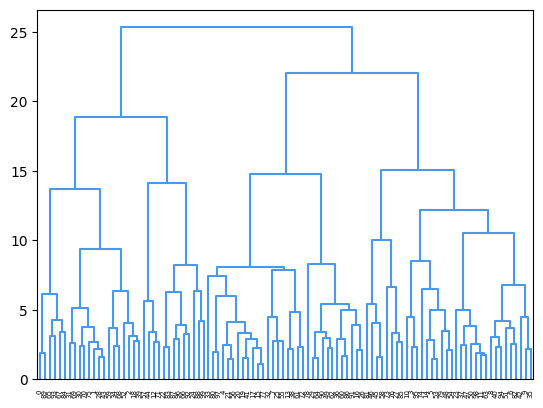

In [ ]:
dendro=linkage(ds2, 'ward')
color = 'blue'
def color_func(x):
    rgb_color = (71, 153, 235)  # Por ejemplo, rojo en formato RGB
    hex_color = '#%02x%02x%02x' % rgb_color
    return hex_color

dendograma2 = sch.dendrogram(dendro, color_threshold=float('inf'), link_color_func=color_func)

CONVERTIR DE DENDO A NEWICK

In [ ]:
tree = convertir_a_Tree(dendro,leaf_names=range(0,100))
#print(tree)

In [ ]:
asignar_nombres(tree)
subarboles2 = obtener_subarboles(tree)

#for i, subarbol in enumerate(subarboles2):
 #   print(f"Subárbol {i + 1} - Representación en formato de texto:")
  #  print(obtener_texto(subarbol))
   # print("\n")

In [ ]:
nsubarboles2 = obtener_n_subarboles(subarboles2,100)
#for n, subarboles in nsubarboles2:
 #   print(f"Subárboles con tamaño {n}:")
  #  for subarbol in subarboles:
   #     print(obtener_texto(subarbol))
    #print("\n")

In [ ]:
nsubsmax = obtener_maximales(nsubarboles2)
# Imprimir o procesar la lista de n-subarboles maximales
#for n, subarboles in nsubsmax:
 #   print(f"Subárboles maximales con tamaño {n}:")
  #  for subarbol in subarboles:
   #     print(obtener_texto(subarbol))
    #print("\n")

In [ ]:
lista = calcular_sn(nsubsmax)

In [ ]:
Base2 = base_topologica(lista, nsubsmax)

Valor máximo en Sn: (4, 15407021574586368)
El valor de n es 4
Base topológica B₄: [['57', '44', '71', '12'], ['73', '76', '85', '27'], ['81', '46', '58', '45'], ['78'], ['24', '99', '88'], ['84', '67', '93', '65'], ['89', '0'], ['10', '95', '3'], ['72', '61', '38', '13'], ['32', '7', '55', '25'], ['33'], ['92', '66', '96', '87'], ['83', '22'], ['52', '2', '39', '18'], ['59', '68', '34'], ['69', '31'], ['42', '35', '9'], ['23'], ['74'], ['91', '26', '16'], ['36', '86', '60'], ['90', '62', '49'], ['64', '29'], ['97', '80'], ['75', '1', '43', '28'], ['70', '30'], ['51', '82', '6'], ['8', '94', '40'], ['50', '98', '63', '11'], ['47', '37'], ['79', '54', '48'], ['14', '53', '5'], ['4', '56', '21'], ['20'], ['17', '77', '15'], ['41', '19']]


### **Análisis Topológico 2**


In [ ]:
categorias_unicas2 = ds1['Quality'].unique()
print(categorias_unicas2)

['good' 'bad']


In [ ]:
buena = dsprueba[dsprueba['Quality']=='good']
#n = len(edades1)
buena.head(10)

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,3.099411,-1.691561,-3.679364,0.963606,0.538102,1.660099,-0.544761148,good
3,-1.612077,-1.554690,2.250267,-0.155060,-1.435862,2.388755,-0.487297287,good
8,-0.815840,-0.301607,-0.001498,-0.384304,-1.081999,2.344492,-0.493978613,good
9,-1.071853,-1.496799,-0.303023,1.425078,2.183076,1.532804,1.433817427,good
10,-2.379440,-3.464898,4.115940,-0.302866,0.983021,1.931703,0.20355982,good
11,-0.646338,-1.895113,1.433269,2.941274,1.883618,0.988795,0.879334374,good
13,1.529403,1.294881,-1.834103,0.964646,-0.176118,1.585643,-0.064779143,good
14,0.427080,-3.100569,3.133362,0.503941,-0.561778,2.525790,-0.998086414,good
22,1.222651,-1.675180,0.919848,-1.906820,2.161397,-0.484258,4.077163435,good
23,-1.318353,-3.237418,2.997672,2.497223,3.050364,-0.659744,-2.054184632,good


In [ ]:
A2 = list(buena.index.astype(str))
A2

['0',
 '3',
 '8',
 '9',
 '10',
 '11',
 '13',
 '14',
 '22',
 '23',
 '24',
 '27',
 '28',
 '30',
 '35',
 '37',
 '38',
 '39',
 '41',
 '43',
 '45',
 '46',
 '47',
 '50',
 '51',
 '54',
 '58',
 '61',
 '62',
 '63',
 '65',
 '66',
 '67',
 '69',
 '70',
 '72',
 '74',
 '75',
 '76',
 '79',
 '81',
 '83',
 '84',
 '87',
 '88',
 '93',
 '94',
 '95',
 '98',
 '99']

In [ ]:
mala = dsprueba[dsprueba['Quality']=='bad']
#n = len(edades1)
mala.head(10)

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
1,1.439788,-0.223976,-0.061449,1.412705,0.885641,-2.191811,1.952776768,bad
2,1.206786,-0.508979,1.736207,1.301011,-0.556149,-1.332052,1.009155619,bad
4,-1.962900,-0.506961,-2.388917,0.136195,-2.780126,1.623751,-1.636458548,bad
5,0.610132,-3.460819,1.336759,0.387452,-0.136781,2.988646,-2.044768947,bad
6,-2.160043,-0.505210,-1.273401,2.283968,0.429886,1.646340,1.663726188,bad
7,-0.062355,-1.324635,-1.782417,-0.346283,-0.937752,0.863851,-2.835235275,bad
12,-4.120193,-1.749556,1.305360,1.107399,-0.195565,0.488467,4.210413891,bad
15,-0.489770,-1.033818,-1.848580,1.047947,-1.725705,1.257670,-0.402743578,bad
16,-1.722888,-1.183176,-1.890238,-1.060362,1.848864,5.201605,-1.12185085,bad
17,0.628772,-0.634391,-2.046147,1.270401,-2.293382,1.179185,0.405925967,bad


In [ ]:
B2 = list(buena.index.astype(str))
B2

['0',
 '3',
 '8',
 '9',
 '10',
 '11',
 '13',
 '14',
 '22',
 '23',
 '24',
 '27',
 '28',
 '30',
 '35',
 '37',
 '38',
 '39',
 '41',
 '43',
 '45',
 '46',
 '47',
 '50',
 '51',
 '54',
 '58',
 '61',
 '62',
 '63',
 '65',
 '66',
 '67',
 '69',
 '70',
 '72',
 '74',
 '75',
 '76',
 '79',
 '81',
 '83',
 '84',
 '87',
 '88',
 '93',
 '94',
 '95',
 '98',
 '99']

In [ ]:
interior(Base2,A2)

['81', '46', '58', '45', '24', '99', '88', '84', '67', '93', '65', '10', '95', '3', '72', '61', '38', '13', '83', '22', '23', '74', '70', '30', '50', '98', '63', '11', '47', '37']


In [ ]:
exterior(Base2,A2)

Exterior: ['57', '44', '71', '12', '78', '32', '7', '55', '25', '33', '59', '68', '34', '91', '26', '16', '36', '86', '60', '64', '29', '97', '80', '4', '56', '21', '20', '17', '77', '15']
